## Data Preparation


In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Importing and checking the data

In [3]:
df = pd.read_csv('day.csv')

In [4]:
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [5]:
df.shape

(730, 16)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


 - Here we dont actually need the instant column, so we opt to drop it.

In [7]:
df = df.drop('instant',axis=1)

## Checking for missing values and their percentage

In [8]:
missing_count = df.isnull().sum()
value_count = df.isnull().count()
missing_percentage = round(missing_count / value_count *100, 2)
missing_df = pd.DataFrame({'count': missing_count, 'percentage': missing_percentage})
print(missing_df)

            count  percentage
dteday          0         0.0
season          0         0.0
yr              0         0.0
mnth            0         0.0
holiday         0         0.0
weekday         0         0.0
workingday      0         0.0
weathersit      0         0.0
temp            0         0.0
atemp           0         0.0
hum             0         0.0
windspeed       0         0.0
casual          0         0.0
registered      0         0.0
cnt             0         0.0


- There are no missing values in our dataframe.

In [9]:
df.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


 - Rounding temp, atemp, hum, windspeed column to 2 decimal point for better interpretation. 

In [10]:
round_list = ['temp','atemp','hum','windspeed']

for i in round_list:
    if i in df:
        df[i] = round(df[i], 2)

In [11]:
df.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,01-01-2018,1,0,1,0,1,1,2,14.11,18.18,80.58,10.75,331,654,985
1,02-01-2018,1,0,1,0,2,1,2,14.90,17.69,69.61,16.65,131,670,801
2,03-01-2018,1,0,1,0,3,1,1,8.05,9.47,43.73,16.64,120,1229,1349
3,04-01-2018,1,0,1,0,4,1,1,8.20,10.61,59.04,10.74,108,1454,1562
4,05-01-2018,1,0,1,0,5,1,1,9.31,11.46,43.70,12.52,82,1518,1600


## Converting columns into their respective categories

In [12]:
df.season.value_counts()

3    188
2    184
1    180
4    178
Name: season, dtype: int64

In [13]:
def season_to_cat(x):
    if x == 1:
        return 'Spring'
    elif x == 2:
        return 'Summer'
    elif x == 3:
        return 'Fall'
    else:
        return 'Winter'

In [14]:
df['season'] = df.season.apply(season_to_cat)

In [15]:
df.season.value_counts()

Fall      188
Summer    184
Spring    180
Winter    178
Name: season, dtype: int64

weathersit : 
    - 1: Clear, Few clouds, Partly cloudy, Partly cloudy
    - 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
    - 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
    - 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog

Here we can see that these we can put these weather conditions into four categories as : 
   - Clean
   - Cloudy 
   - Light Rain/Snow
   - Very Bad weather

In [16]:
df['weathersit'].value_counts()

1    463
2    246
3     21
Name: weathersit, dtype: int64

In [17]:
def weather_to_cat(x):
    if x == 1:
        return 'Clean'
    elif x == 2:
        return 'Cloudy'
    elif x == 3:
        return 'Light Rain/Snow'
    else:
        return 'Very Bad Weather'

In [18]:
df['weathersit'] = df['weathersit'].apply(weather_to_cat)

In [19]:
df['weathersit'].value_counts()

Clean              463
Cloudy             246
Light Rain/Snow     21
Name: weathersit, dtype: int64

In [20]:
df.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,01-01-2018,Spring,0,1,0,1,1,Cloudy,14.11,18.18,80.58,10.75,331,654,985
1,02-01-2018,Spring,0,1,0,2,1,Cloudy,14.90,17.69,69.61,16.65,131,670,801
2,03-01-2018,Spring,0,1,0,3,1,Clean,8.05,9.47,43.73,16.64,120,1229,1349
3,04-01-2018,Spring,0,1,0,4,1,Clean,8.20,10.61,59.04,10.74,108,1454,1562
4,05-01-2018,Spring,0,1,0,5,1,Clean,9.31,11.46,43.70,12.52,82,1518,1600


 - We can see that we dont really need the date column as we already have year, month, weekday and working day values.

In [21]:
df = df.drop('dteday',axis=1)

In [22]:
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,Spring,0,1,0,1,1,Cloudy,14.11,18.18,80.58,10.75,331,654,985
1,Spring,0,1,0,2,1,Cloudy,14.90,17.69,69.61,16.65,131,670,801
2,Spring,0,1,0,3,1,Clean,8.05,9.47,43.73,16.64,120,1229,1349
3,Spring,0,1,0,4,1,Clean,8.20,10.61,59.04,10.74,108,1454,1562
4,Spring,0,1,0,5,1,Clean,9.31,11.46,43.70,12.52,82,1518,1600


In [23]:
df['yr'] = df['yr'].apply(lambda x: '2018' if x is 0 else '2019')

In [24]:
def month_to_cat(x):
    if x == 1:
        return 'jan'
    elif x == 2:
        return 'feb'
    elif x == 3:
        return 'mar'
    elif x == 4:
        return 'apr'
    elif x == 5:
        return 'may'
    elif x == 6:
        return 'jun'
    elif x == 7:
        return 'jul'
    elif x == 8:
        return 'aug'
    elif x == 9:
        return 'sept'
    elif x == 10:
        return 'oct'
    elif x == 11:
        return 'nov'
    elif x == 12:
        return 'dec'
    
df['mnth'] = df['mnth'].apply(month_to_cat)

In [25]:
df['holiday'] = df['holiday'].apply(lambda x: 'Yes' if x==1 else 'No')

In [26]:
df['workingday'] = df['workingday'].apply(lambda x: 'Yes' if x == 1 else 'No')

In [27]:
def day_to_cat(x):
    if x == 1:
        return 'Mon'
    elif x == 2:
        return 'Tue'
    elif x == 3:
        return 'Wed'
    elif x == 4:
        return 'Thur'
    elif x == 5:
        return 'Fri'
    elif x == 6:
        return 'Sat'
    else:
        return 'Sun'
    
df['weekday'] = df['weekday'].apply(day_to_cat)

In [28]:
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,Spring,2018,jan,No,Mon,Yes,Cloudy,14.11,18.18,80.58,10.75,331,654,985
1,Spring,2018,jan,No,Tue,Yes,Cloudy,14.90,17.69,69.61,16.65,131,670,801
2,Spring,2018,jan,No,Wed,Yes,Clean,8.05,9.47,43.73,16.64,120,1229,1349
3,Spring,2018,jan,No,Thur,Yes,Clean,8.20,10.61,59.04,10.74,108,1454,1562
4,Spring,2018,jan,No,Fri,Yes,Clean,9.31,11.46,43.70,12.52,82,1518,1600


- Now we can see that we've converted the categorical columns to their respective categories.

## Exploratory Data Analysis
 - Lets first get all the columns containing numeric and categorical variables.

In [29]:
from pandas.api.types import is_string_dtype, is_numeric_dtype

In [30]:
num_list = []
cat_list = []

for column in df:
    if is_string_dtype(df[column]):
        cat_list.append(column)
    elif is_numeric_dtype(df[column]):
        num_list.append(column)

print(num_list)
print(cat_list)

['temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']
['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit']


## Univariate Analysis

 - We are using bar charts to visualize the categorical variables.
 - For numeric variables we are using histogram to see the distribution of the data.

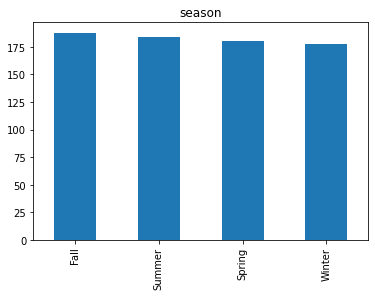

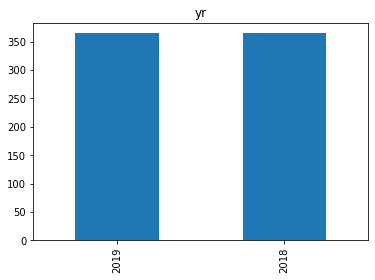

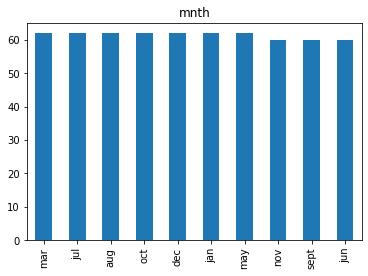

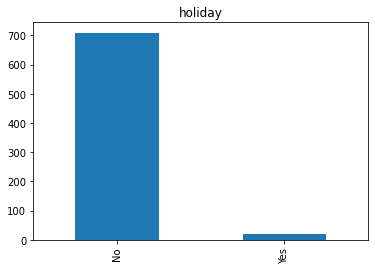

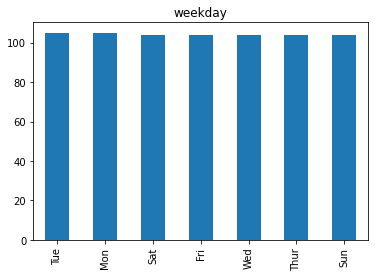

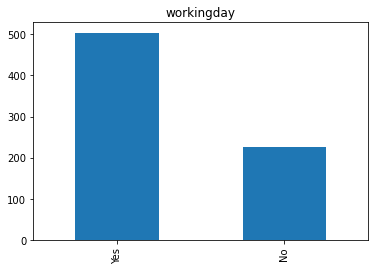

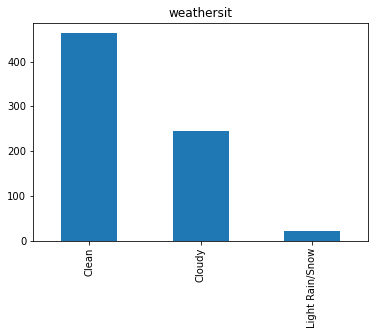

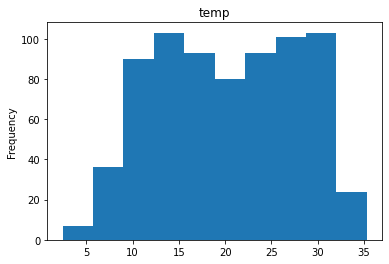

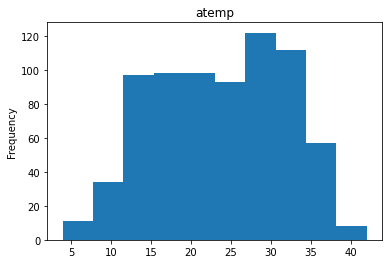

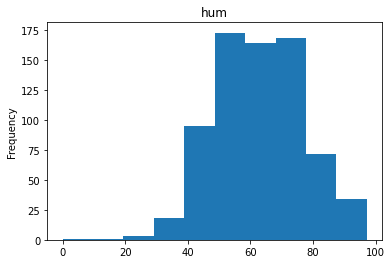

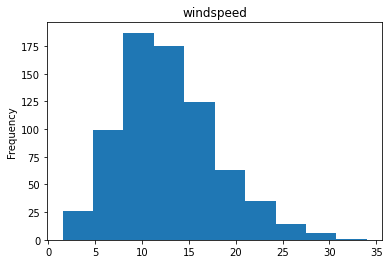

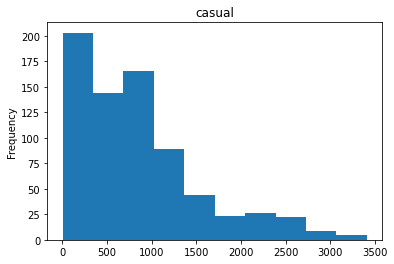

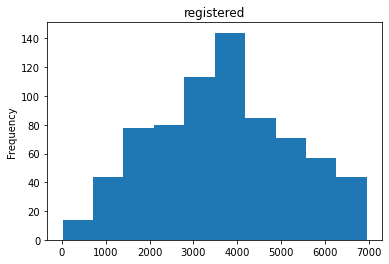

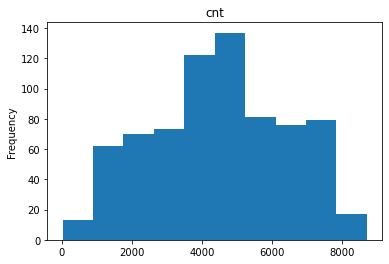

In [31]:
for column in df:
    plt.figure(column)
    plt.title(column)
    if is_numeric_dtype(df[column]):
        df[column].plot(kind = 'hist')
    elif is_string_dtype(df[column]):
        df[column].value_counts()[:10].plot(kind = 'bar')

 - We can't really interpret anything about our data just by looking at a single variable.
 - Best way to get idea about the numeric variable is to plot the correlation mattrix of the variables.
 - This will tell us how a variable is correlated with other variable.
 - For categorical variables its better to plot the pairplots.

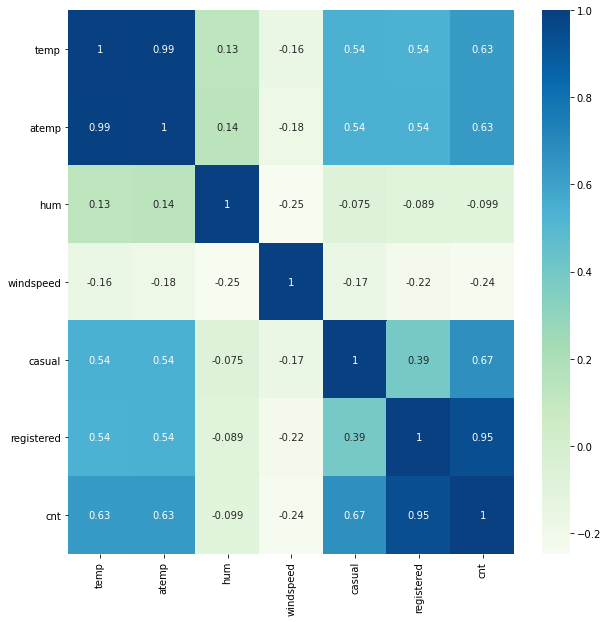

In [32]:
plt.figure(figsize=[10,10])
sns.heatmap(df.corr(),annot=True, cmap='GnBu')
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.show()

 - **Inferences.**
    - We can clearly see that regiestred users and count which is our dependent variable in this case study are highly correlated.
    - Casual users are second highest correlators.

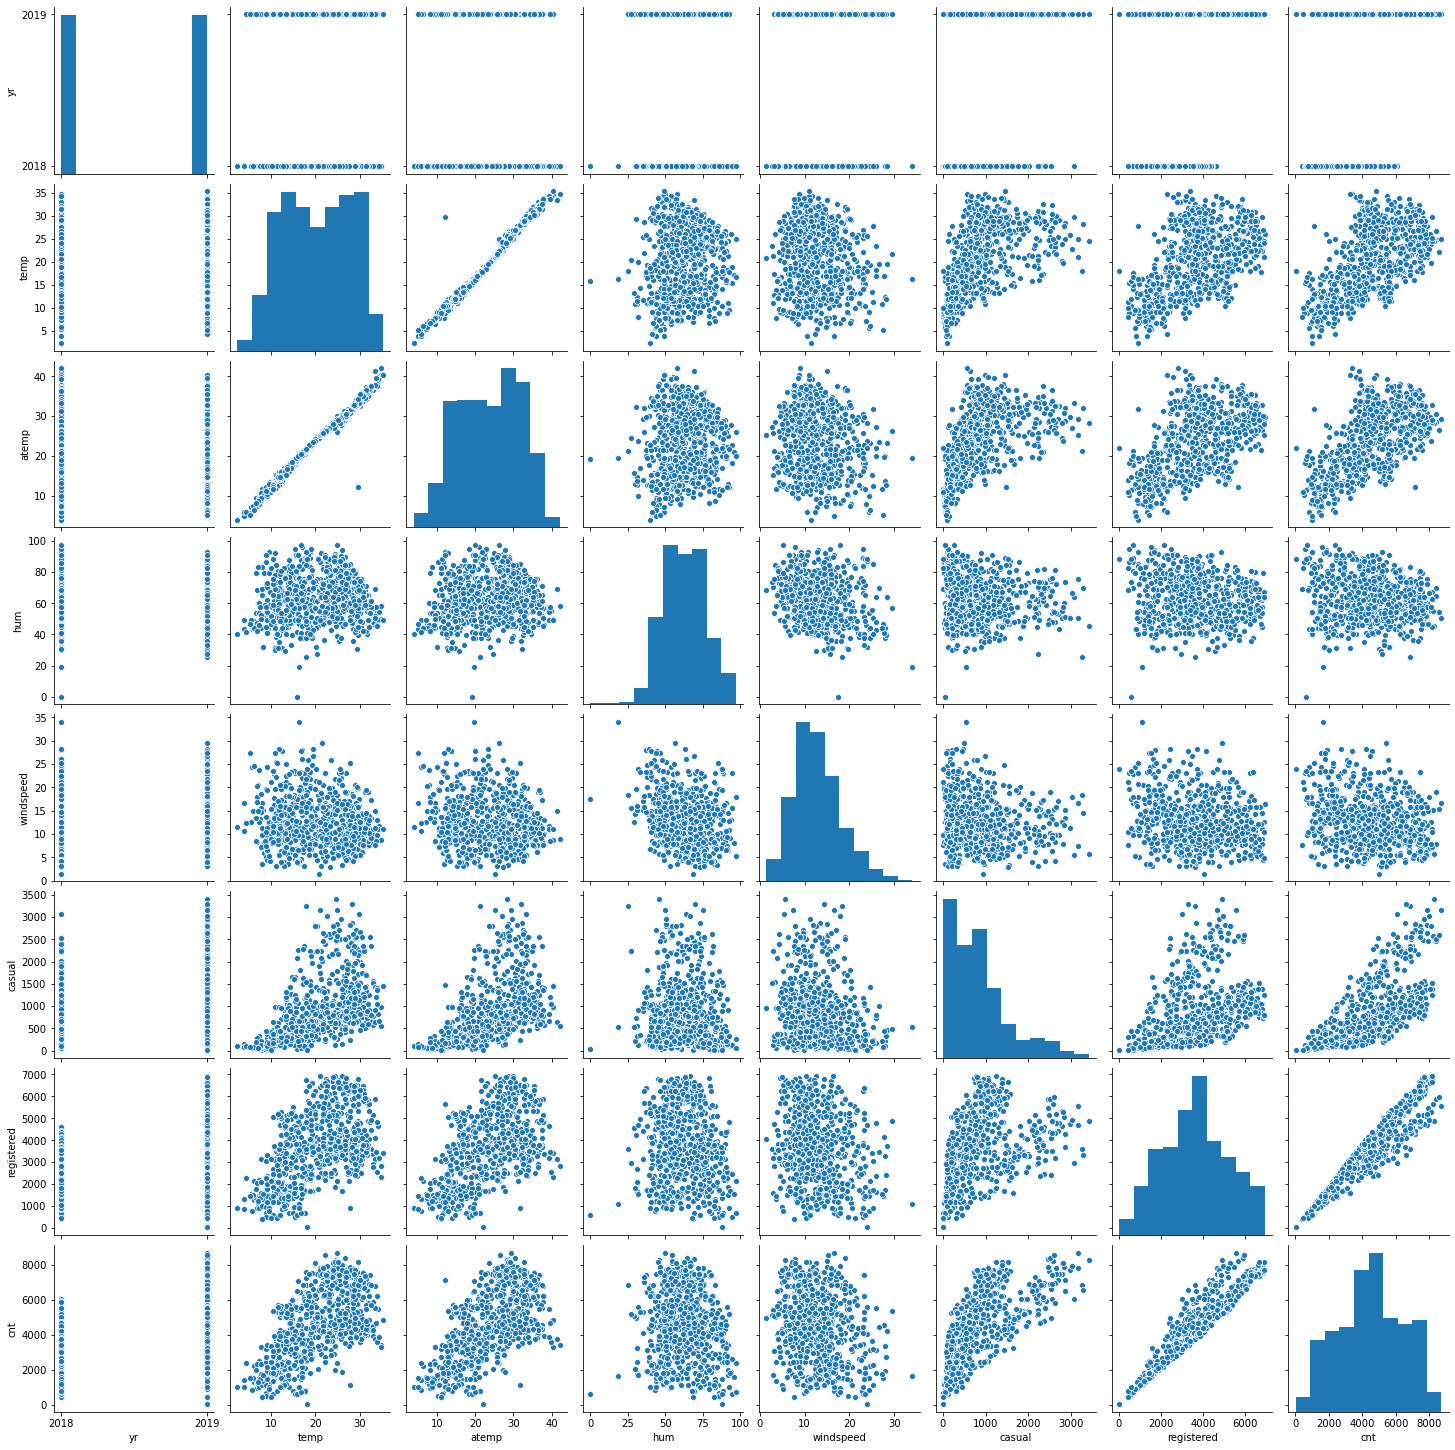

In [33]:
sns.pairplot(df)
plt.show()

 - **Inferences.**
     - We can clearly that there is a linear relationship between registered and casual users with count.  

## Plotting categorical variables against target variable.

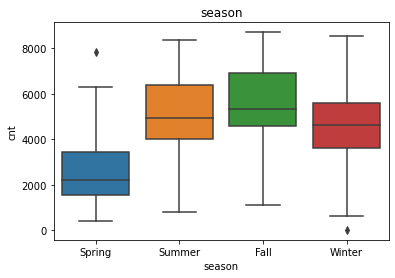

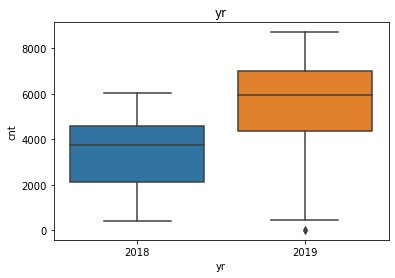

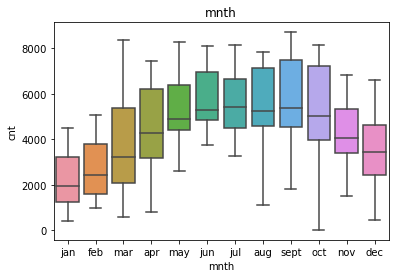

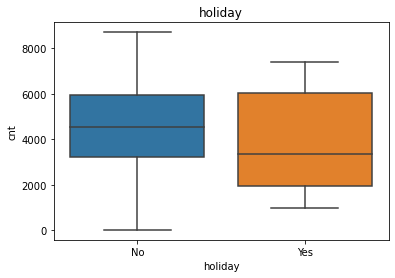

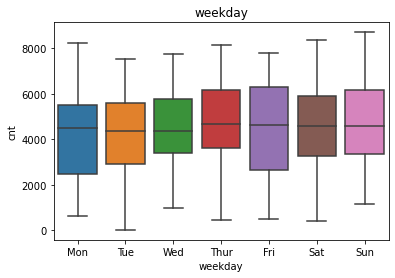

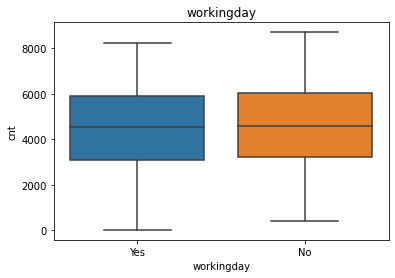

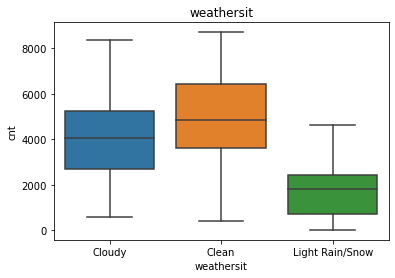

In [34]:
for column in cat_list:
    plt.figure(column)
    plt.title(column)
    sns.boxplot(data=df, x=column, y='cnt')

- **Inferences.**
    - We can see that the count is highest in the Fall season and its very low in the Spring season.
    - Also the count has gone up in year 2019.
    - Count is very low in Light Rain / Slow weather.

## Plotting Numeric variables against Target variable.

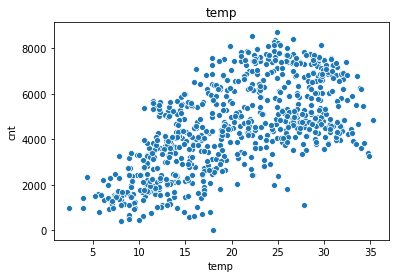

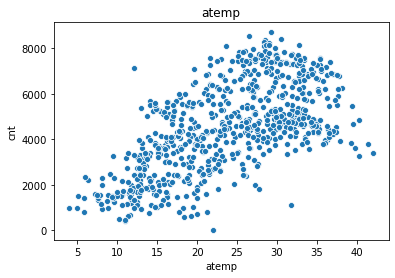

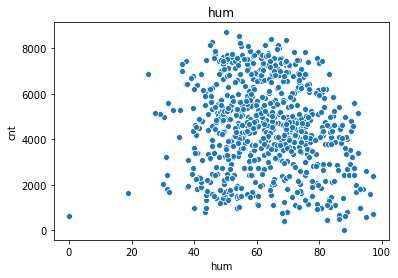

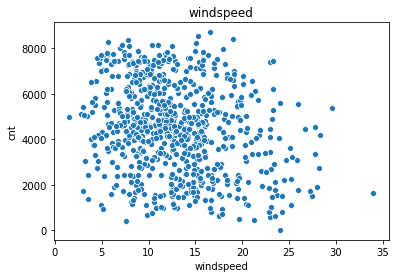

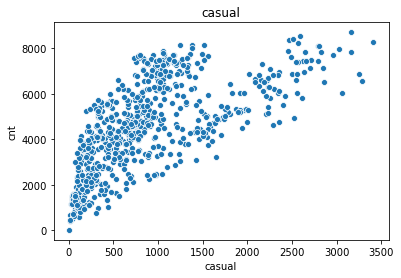

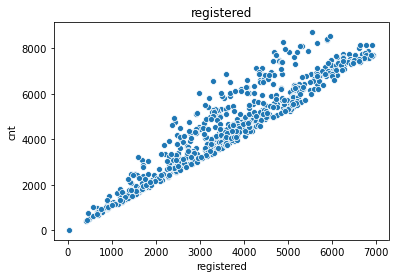

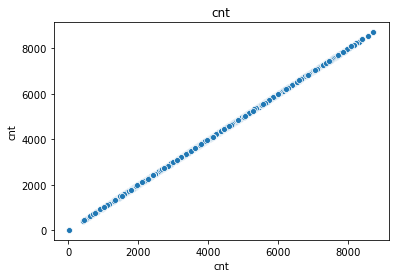

In [35]:
for column in num_list:
    plt.figure(column)
    plt.title(column)
    sns.scatterplot(data = df, x = column, y = 'cnt')

 - **Inferences.**
     - We can clearly that there is a linear relationship between registered and casual users with count.  

## Plotting Categorial Vs Categorical

 - The relationship between two categorical variables can be visualized using grouped bar charts.

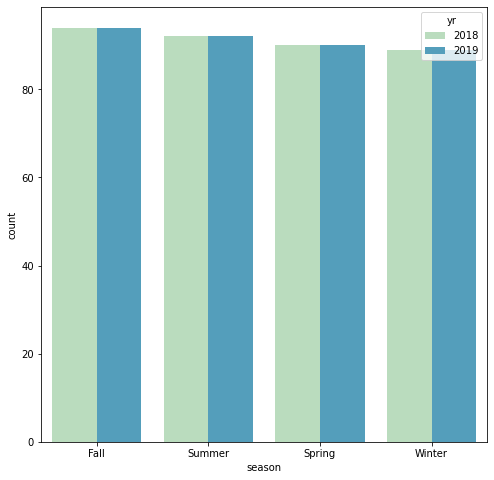

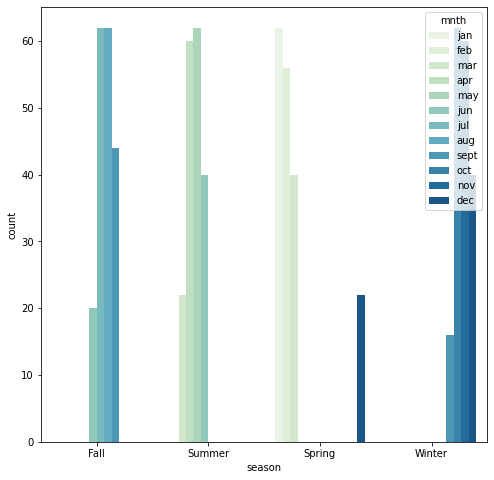

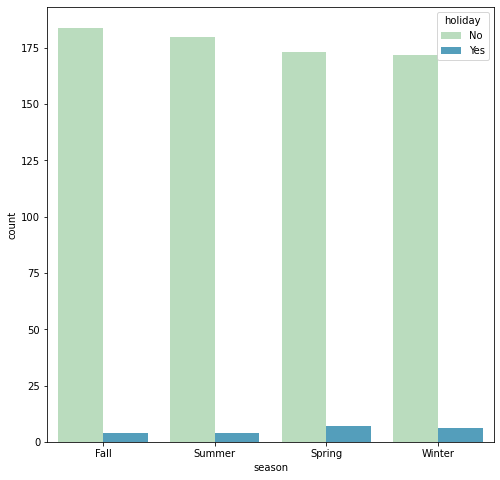

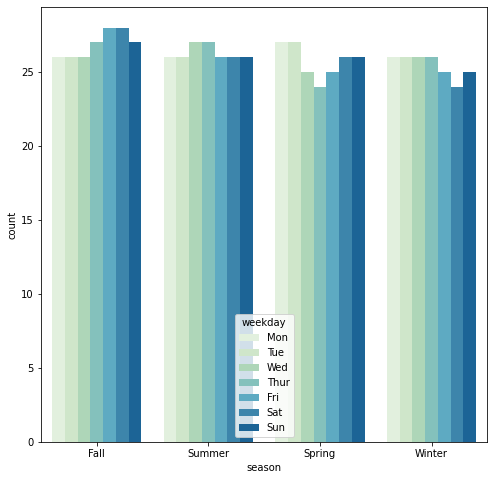

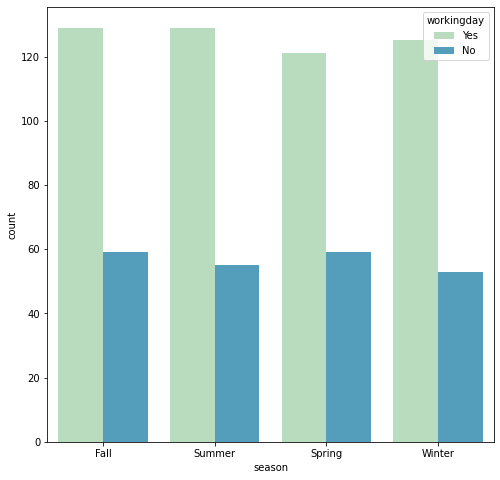

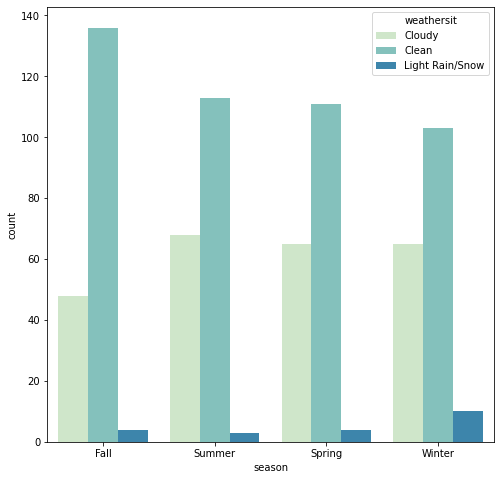

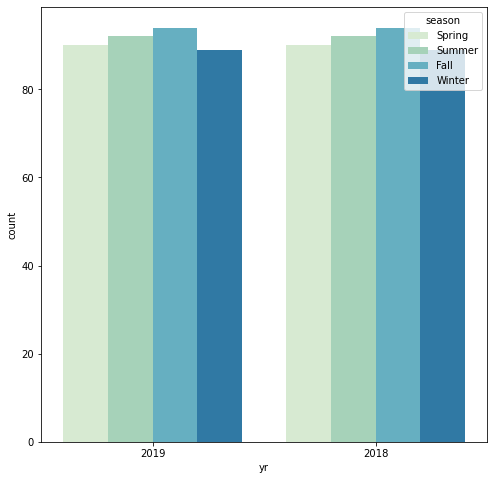

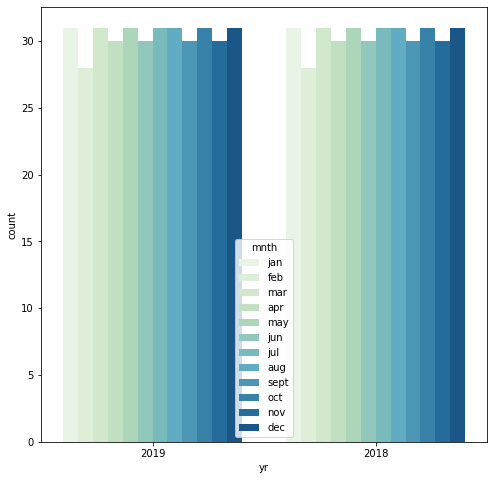

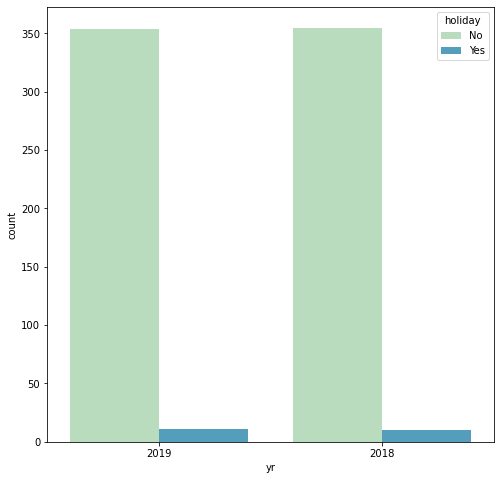

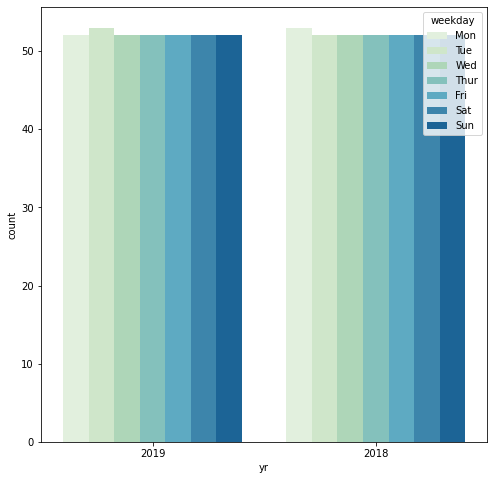

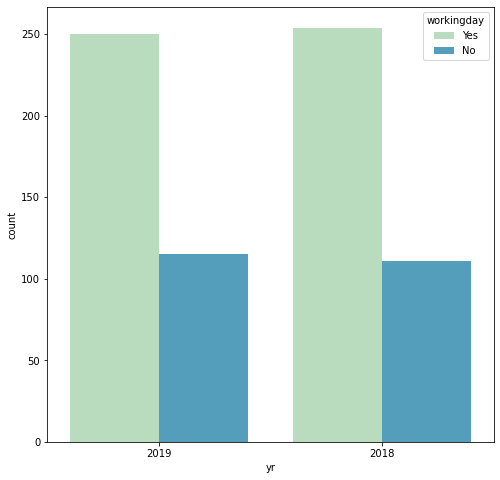

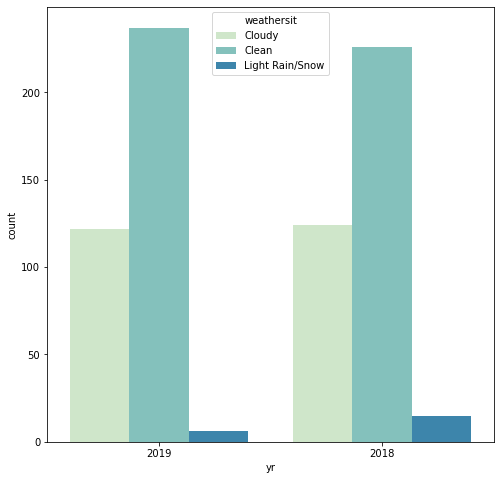

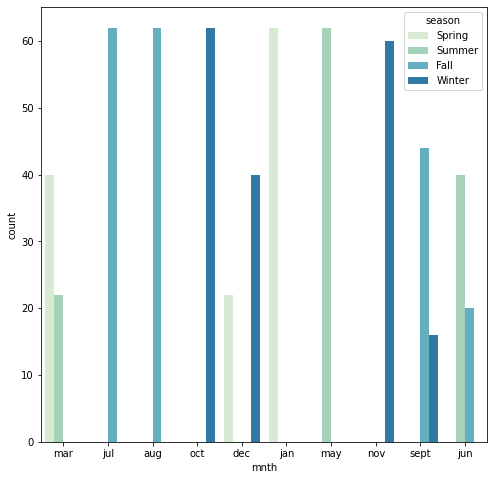

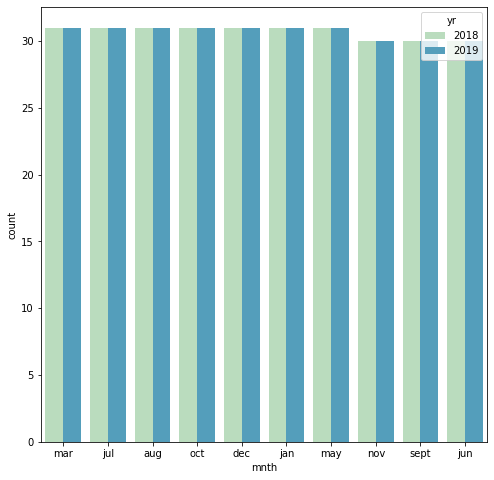

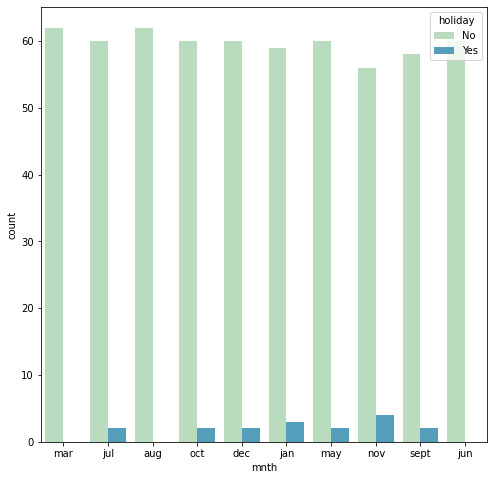

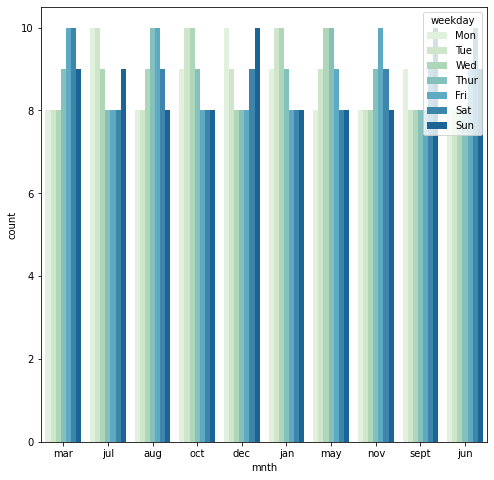

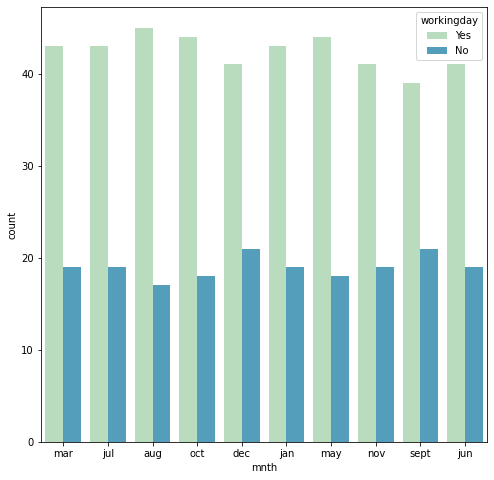

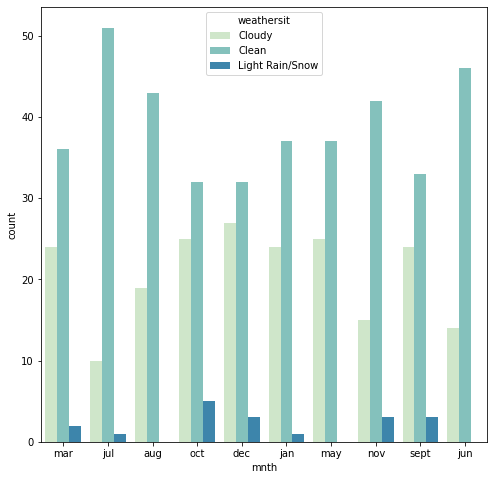

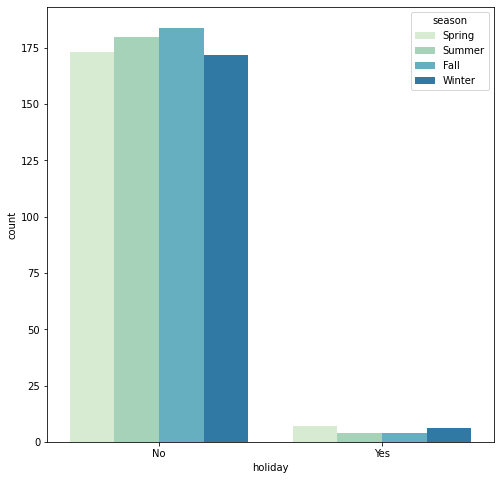

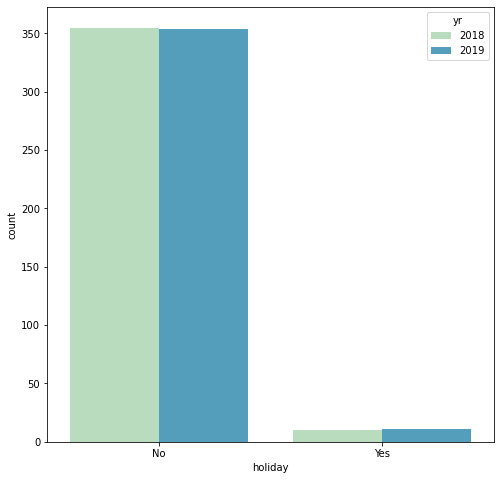

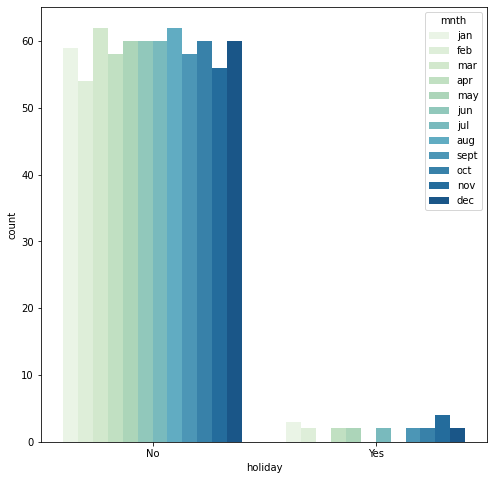

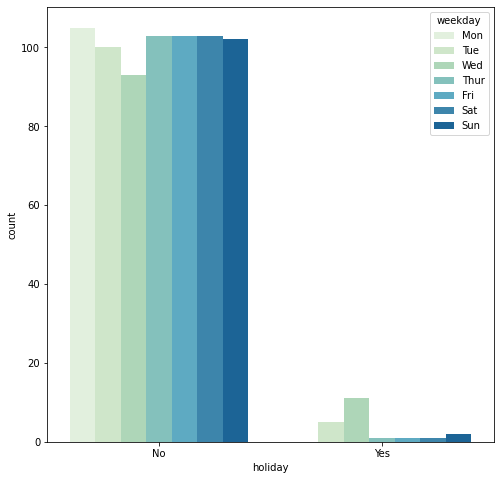

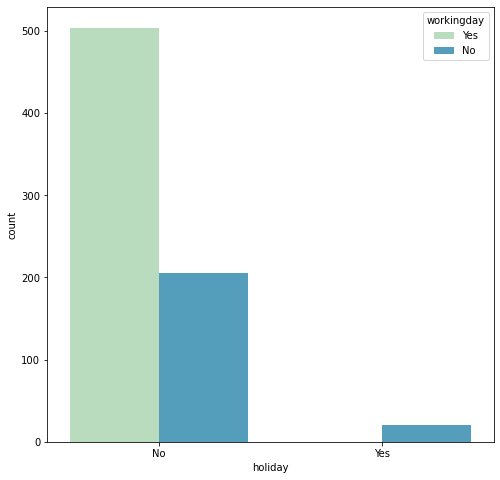

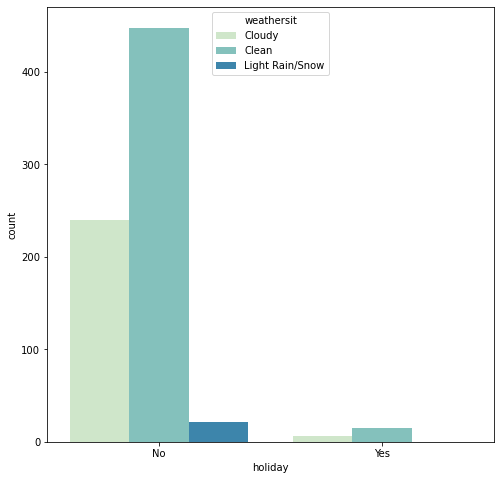

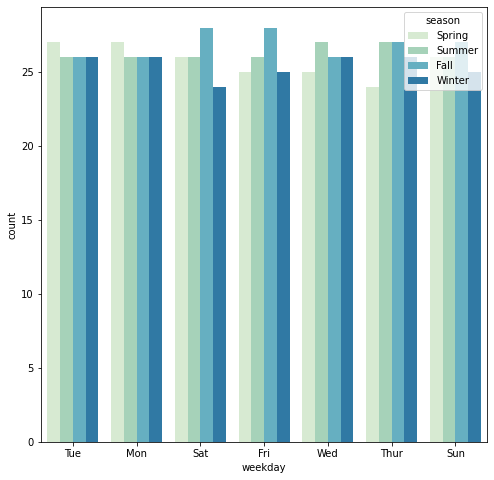

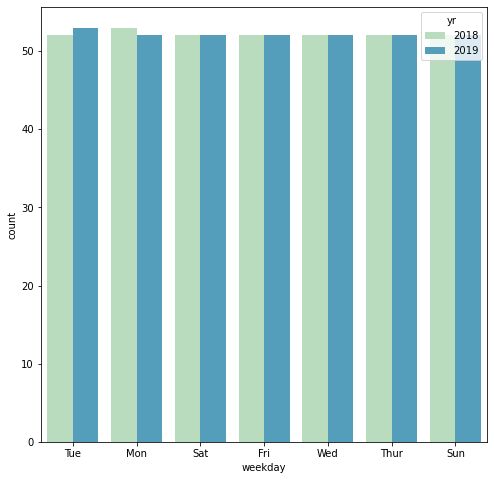

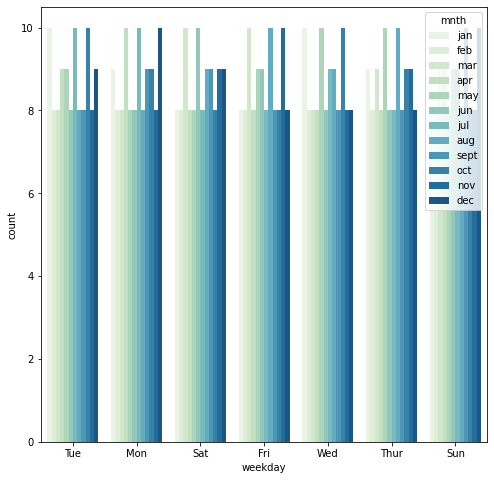

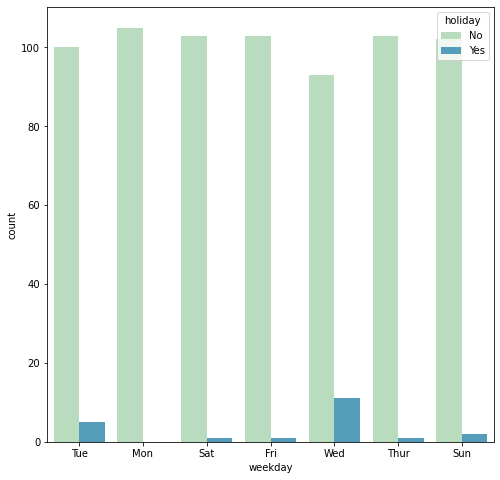

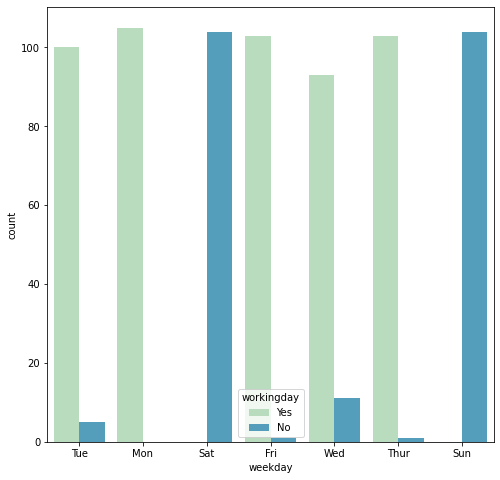

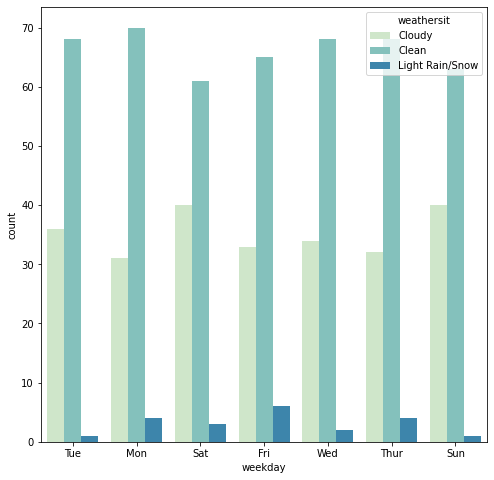

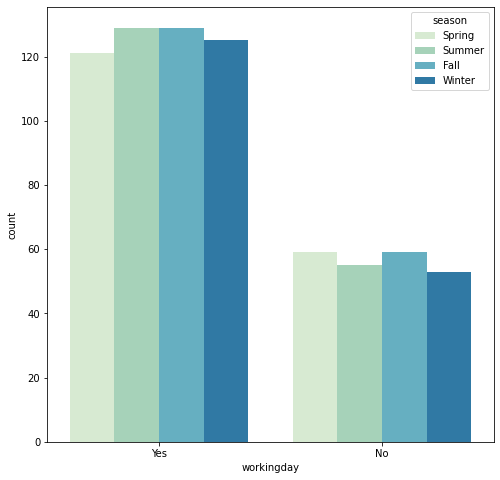

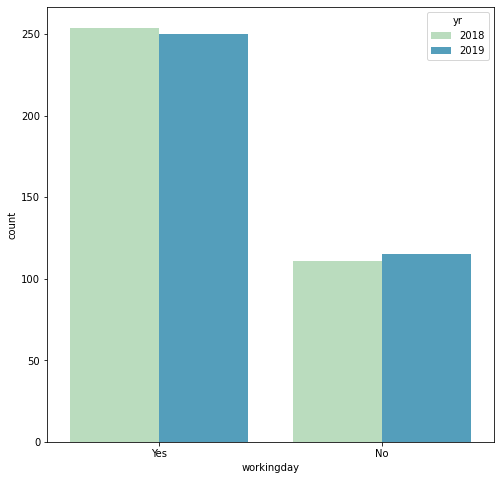

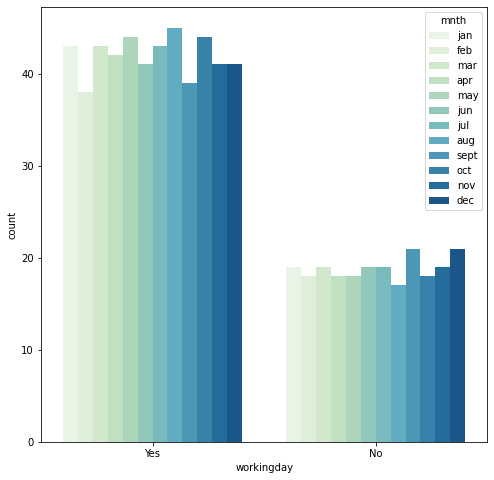

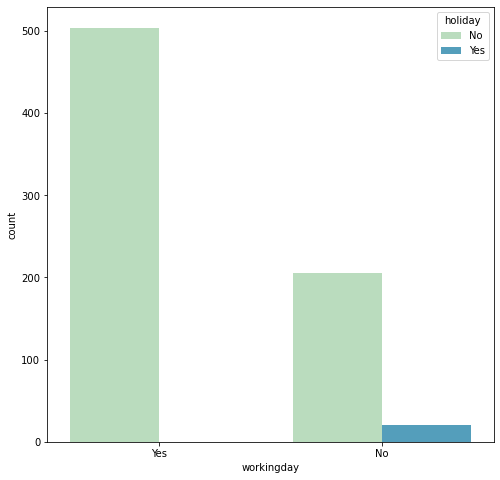

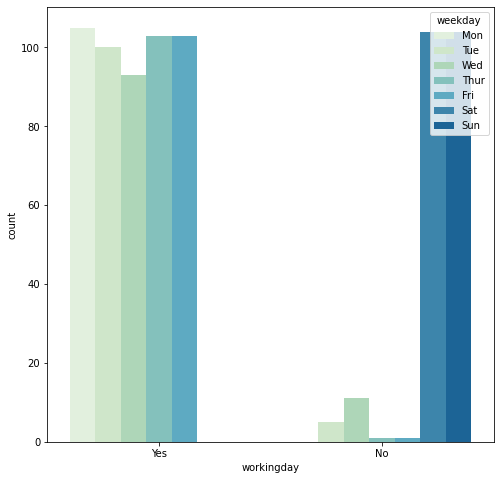

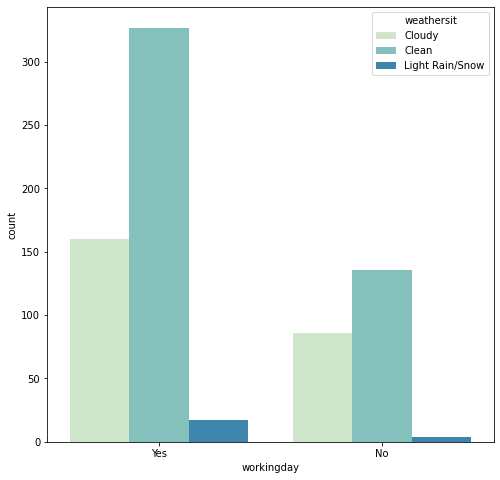

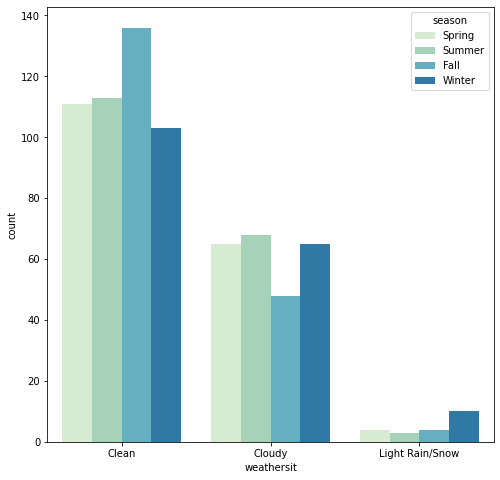

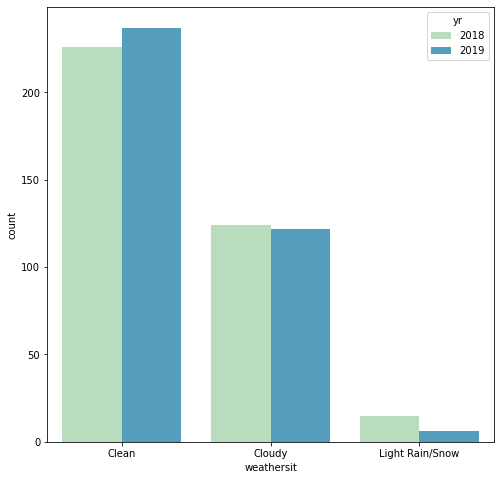

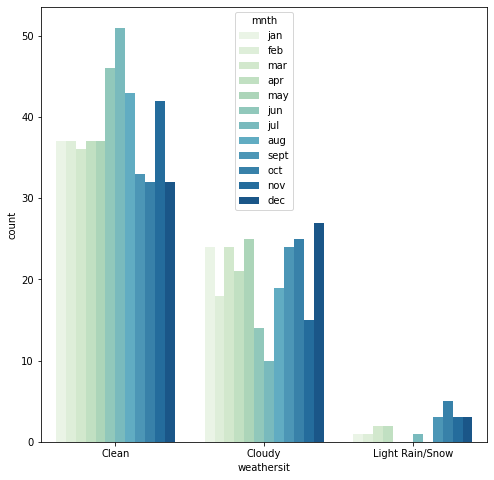

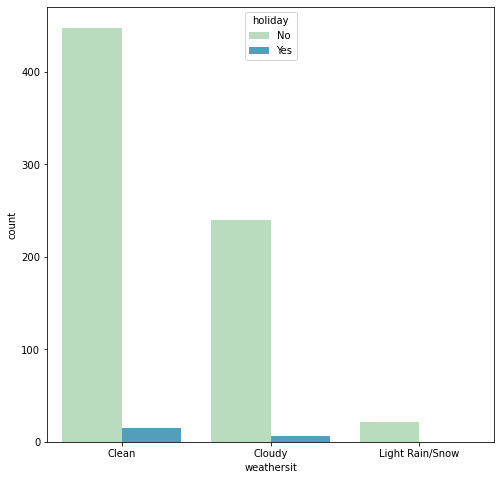

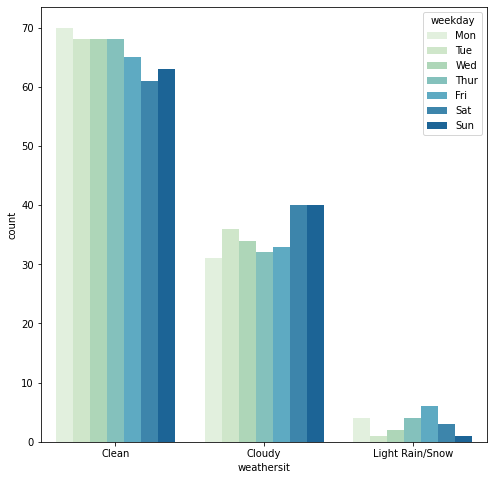

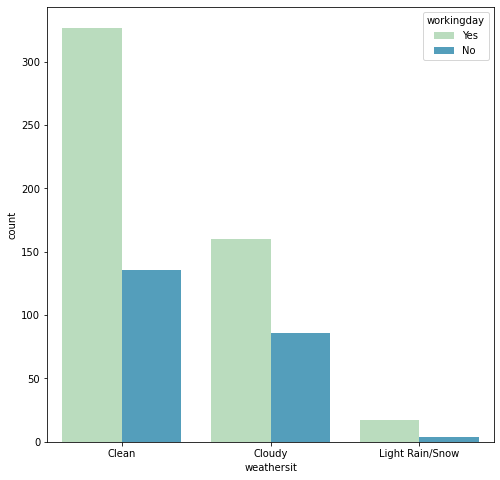

In [36]:
for i in range(0, len(cat_list)):
    primary_cat = cat_list[i]
    for j in range(0, len (cat_list)):
        secondary_cat = cat_list[j]
        if secondary_cat != primary_cat:
            plt.figure(figsize=(8,8))
            chart = sns.countplot(
            data = df,
            x = primary_cat,
            hue = secondary_cat,
            palette = 'GnBu',
            order = df[primary_cat].value_counts().iloc[:10].index
            )

## Plotting Categorical Vs Numeric variables.
 - We are using boxplot here to see how numerical data varies across groups.

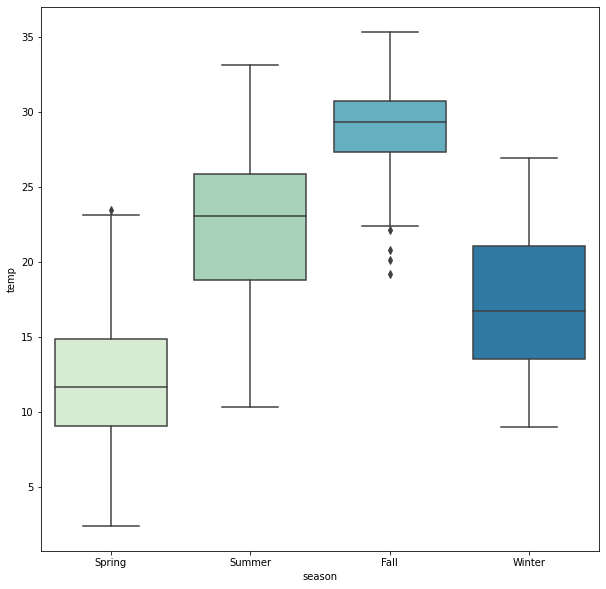

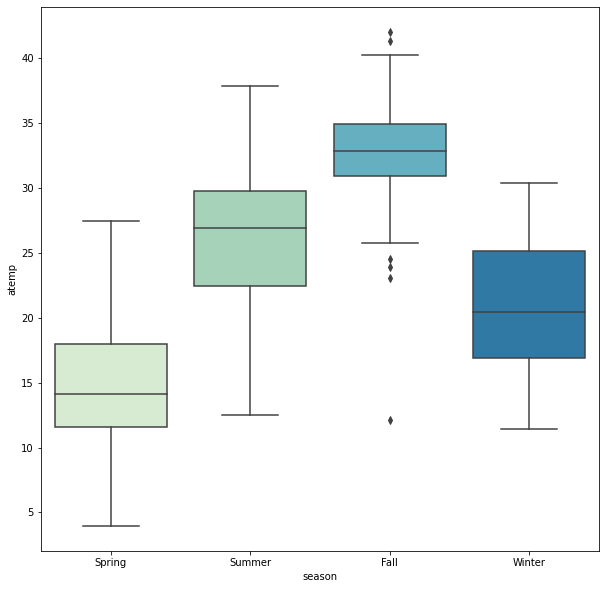

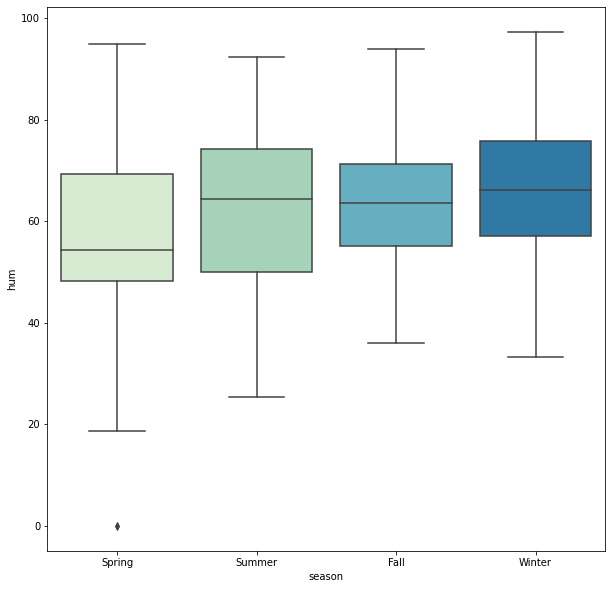

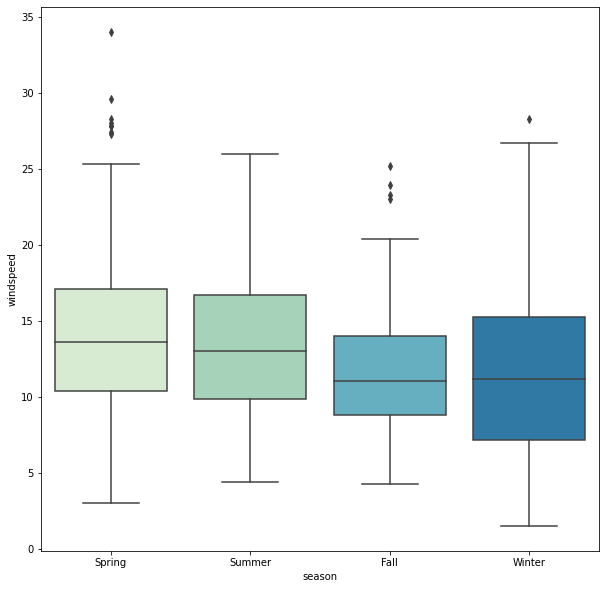

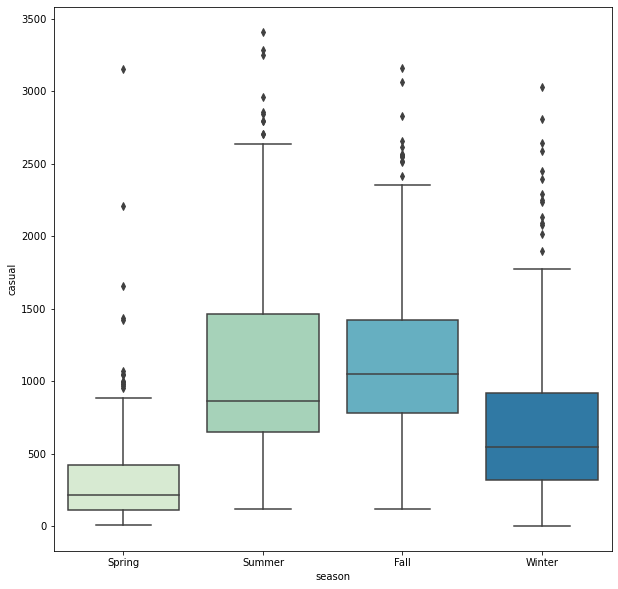

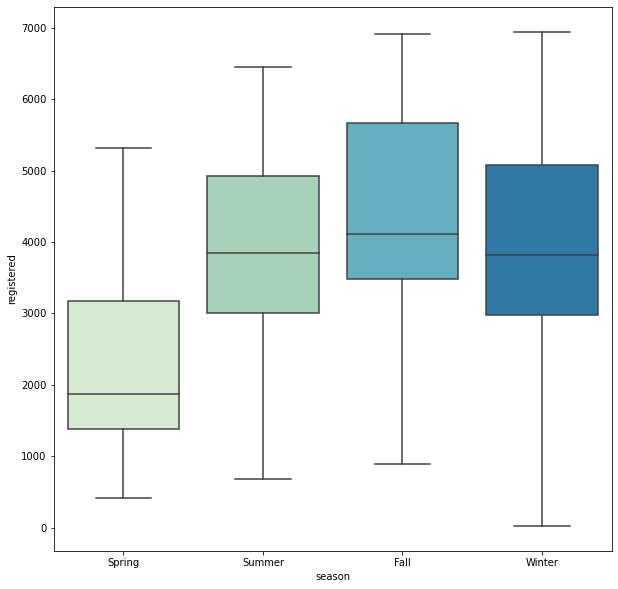

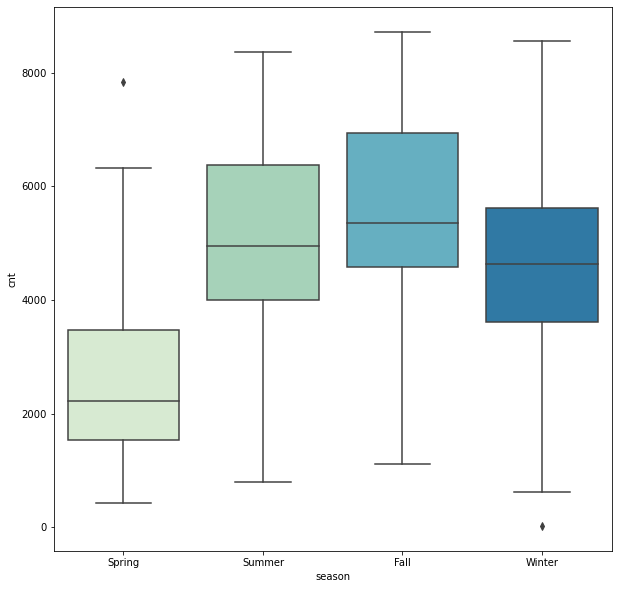

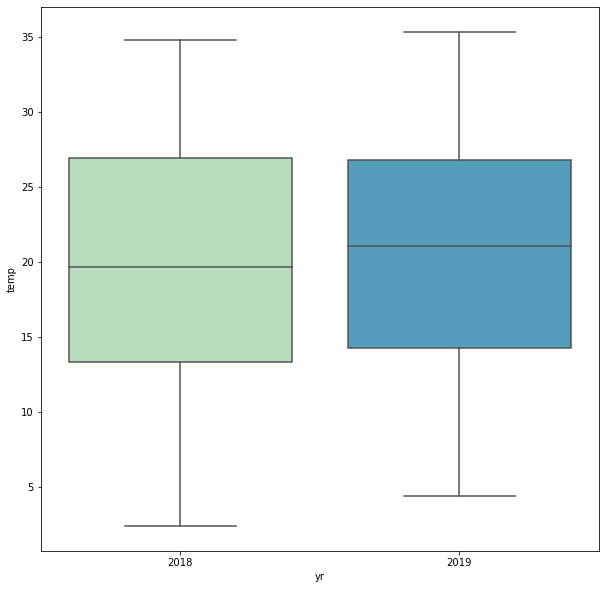

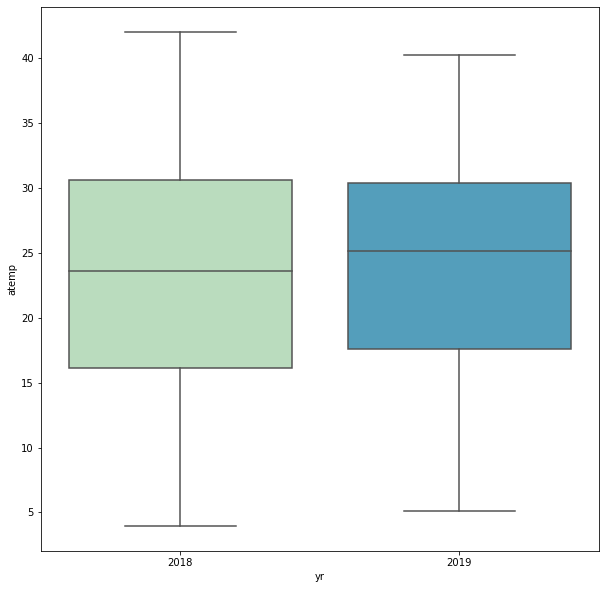

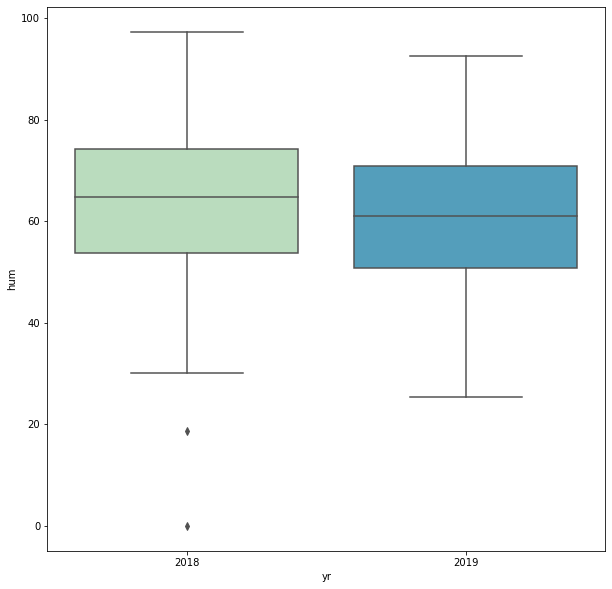

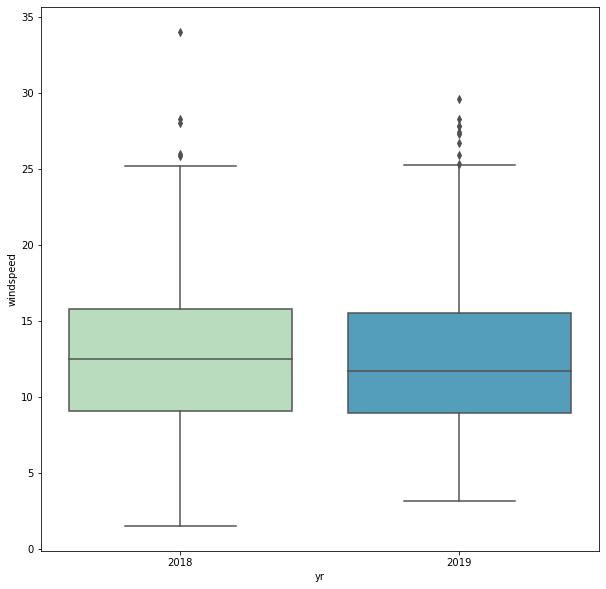

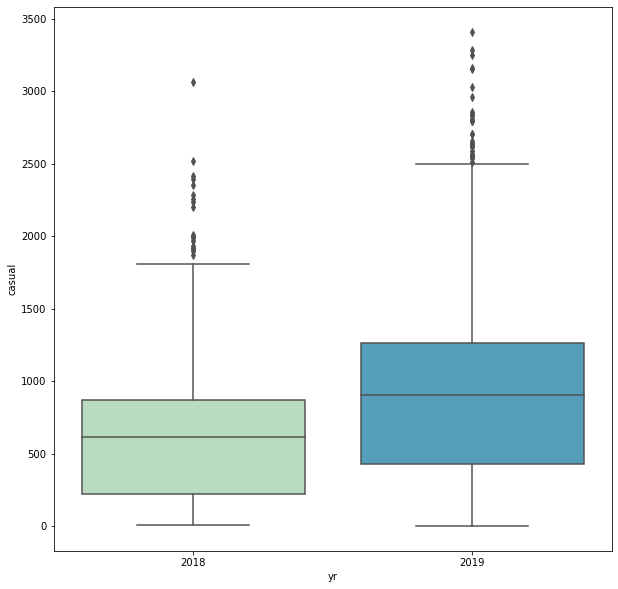

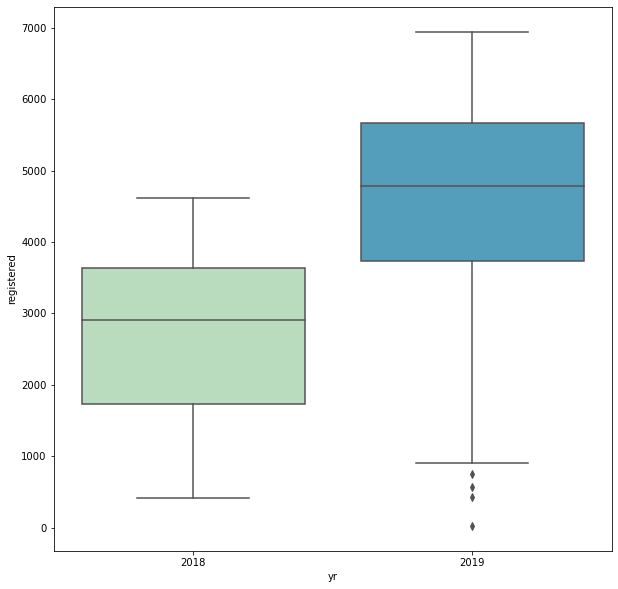

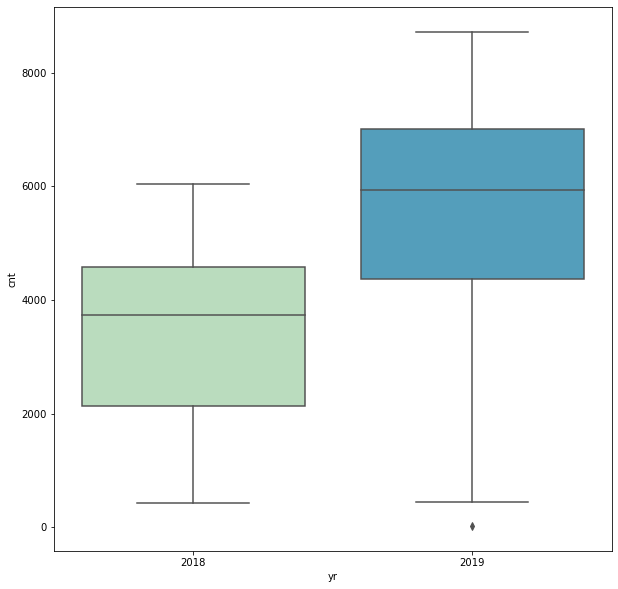

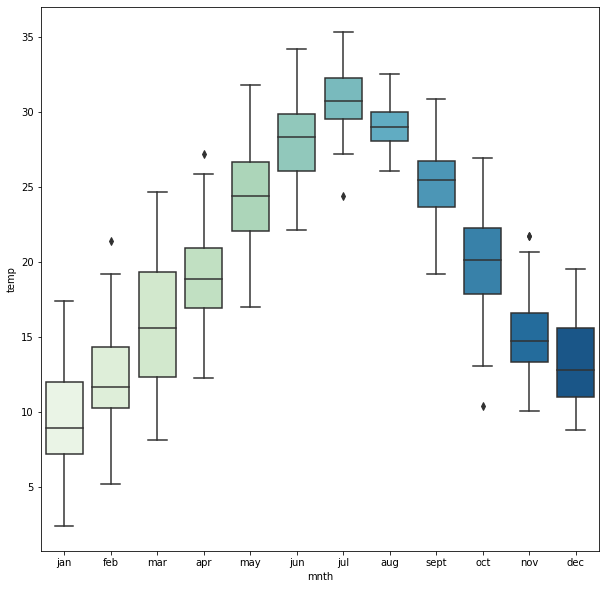

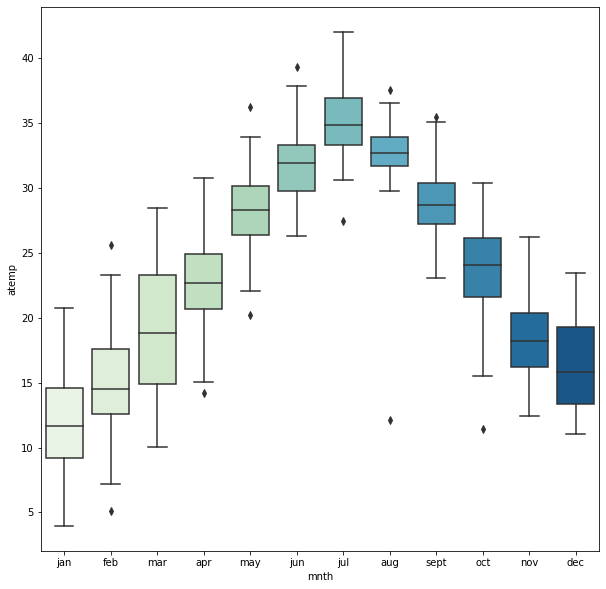

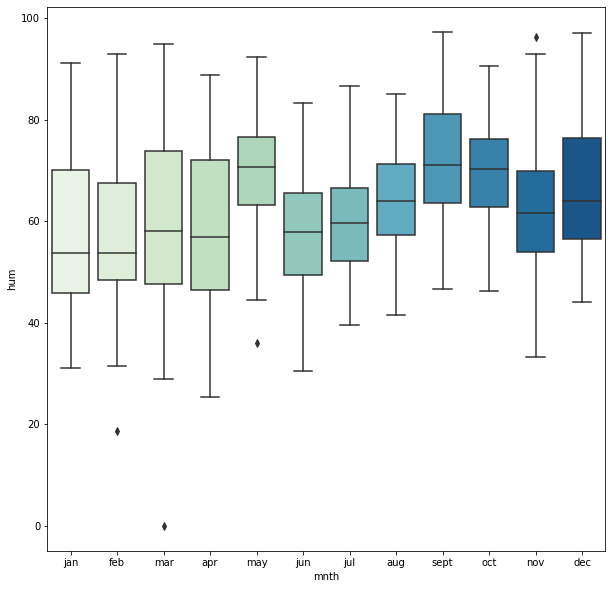

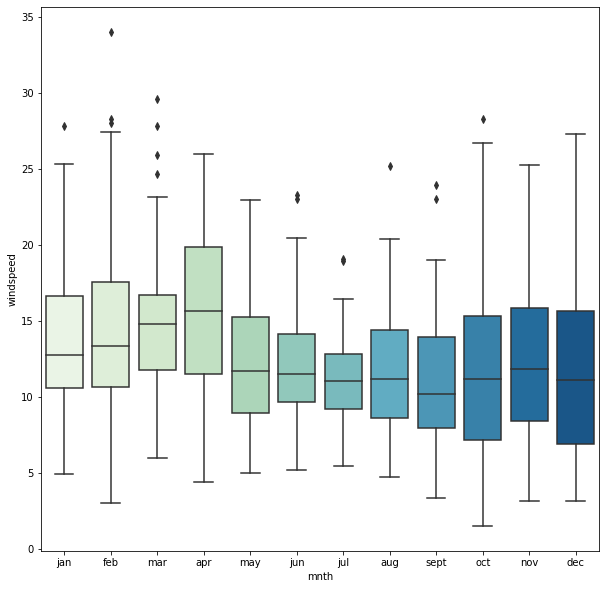

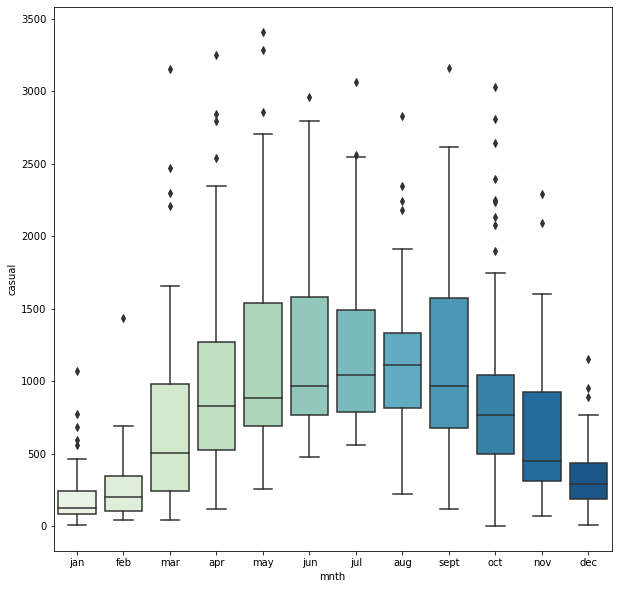

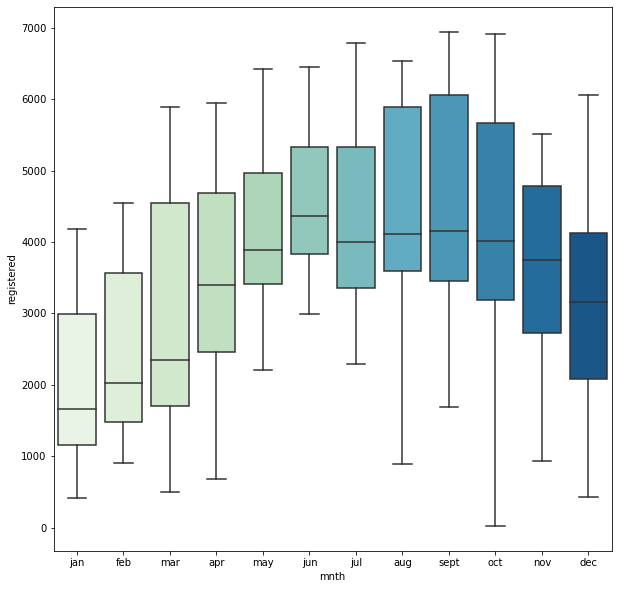

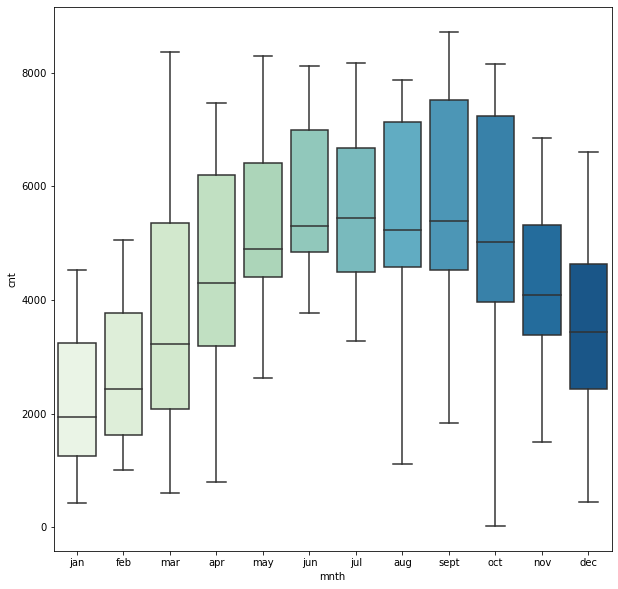

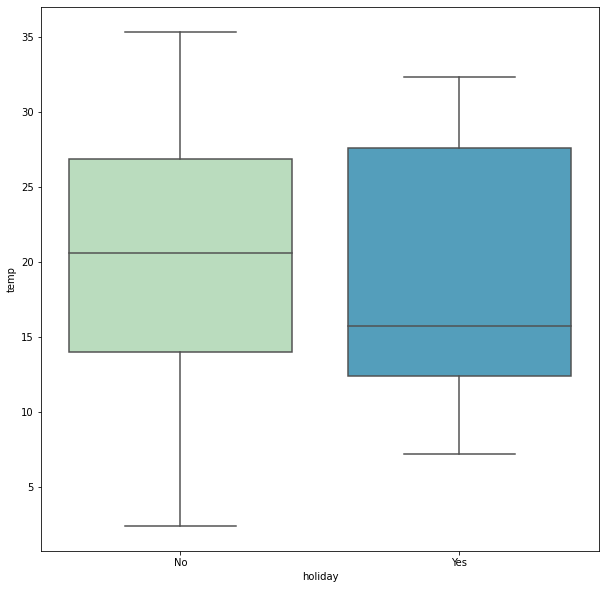

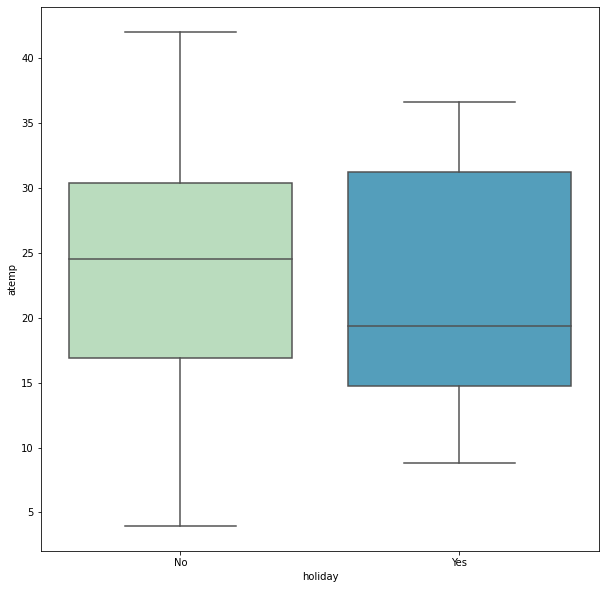

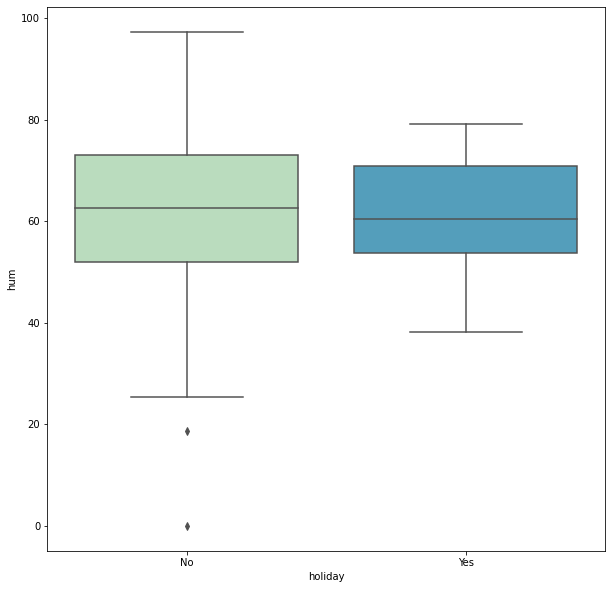

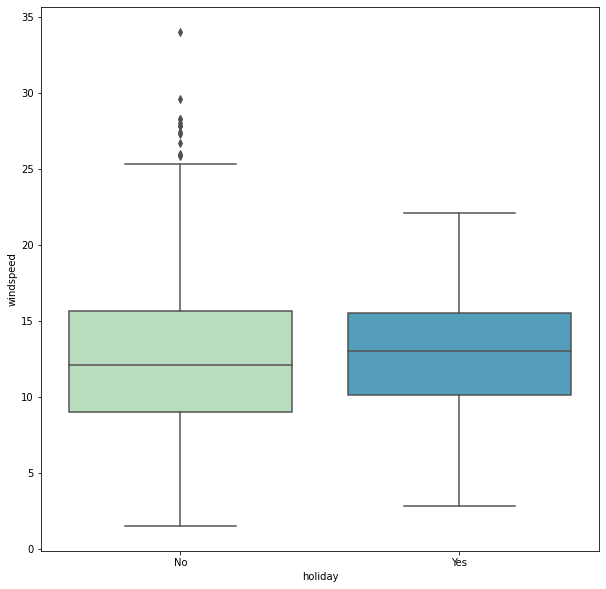

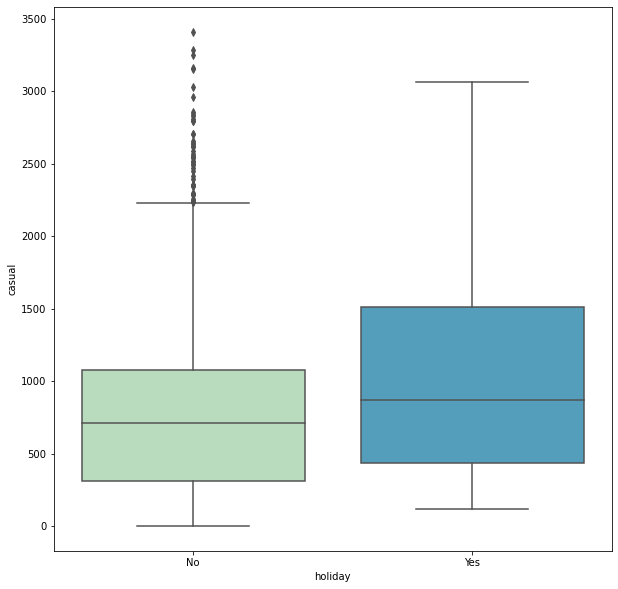

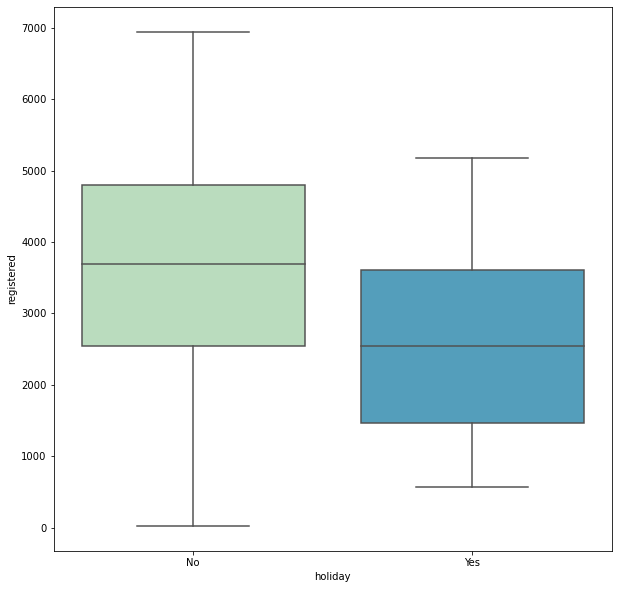

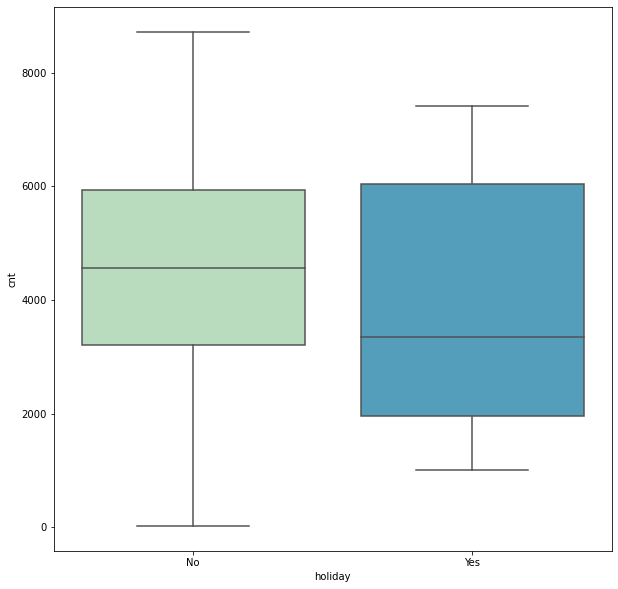

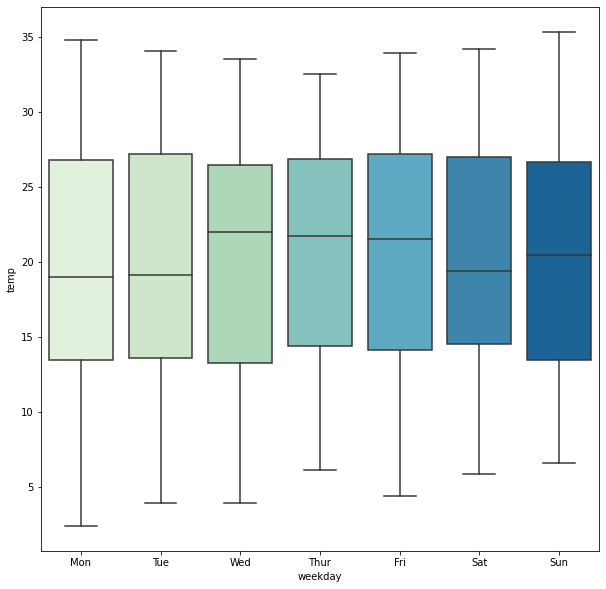

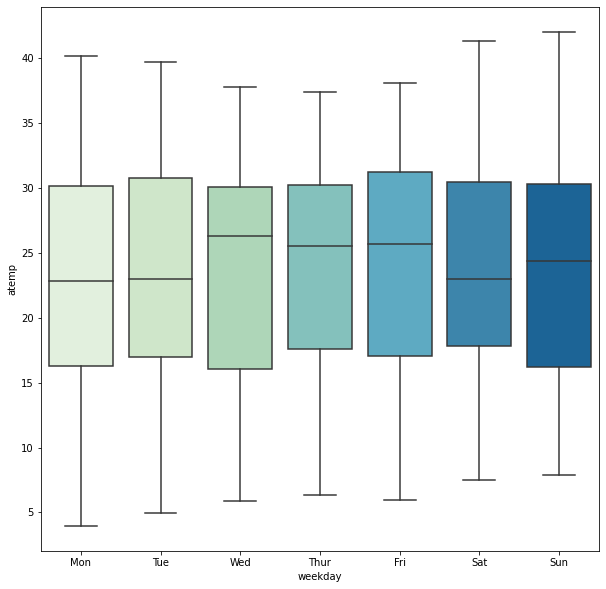

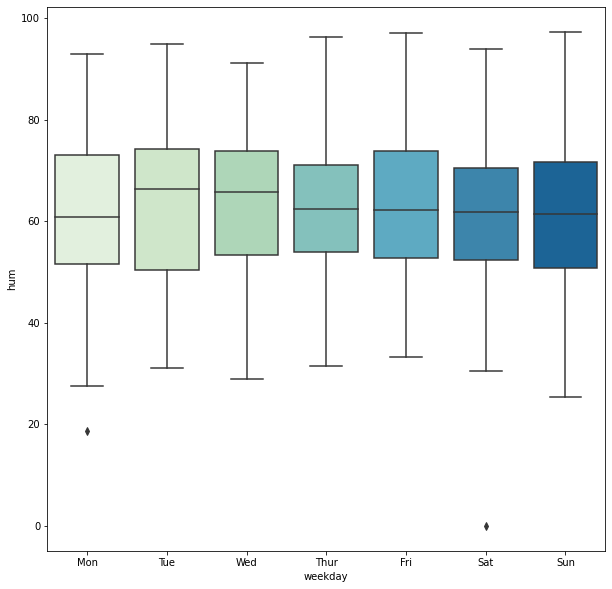

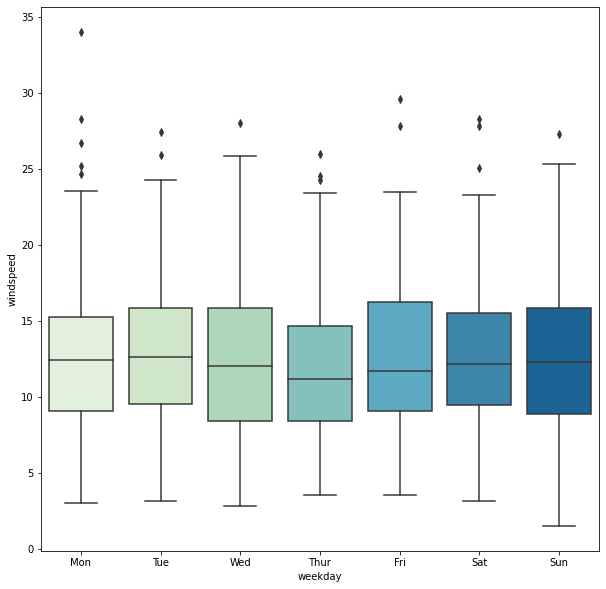

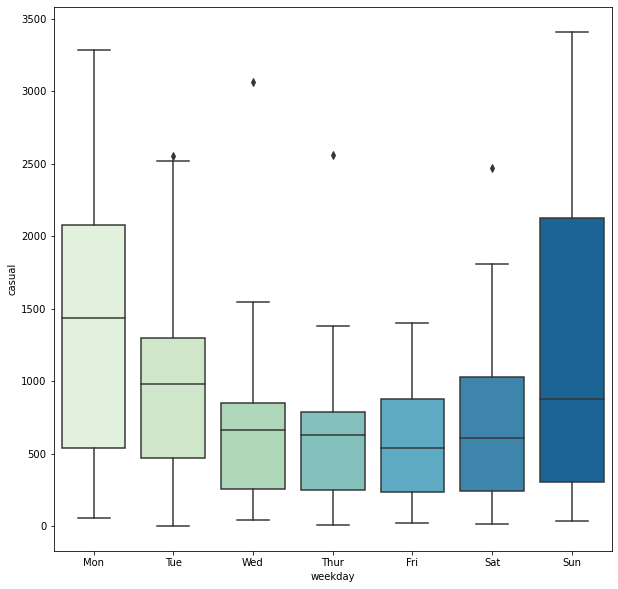

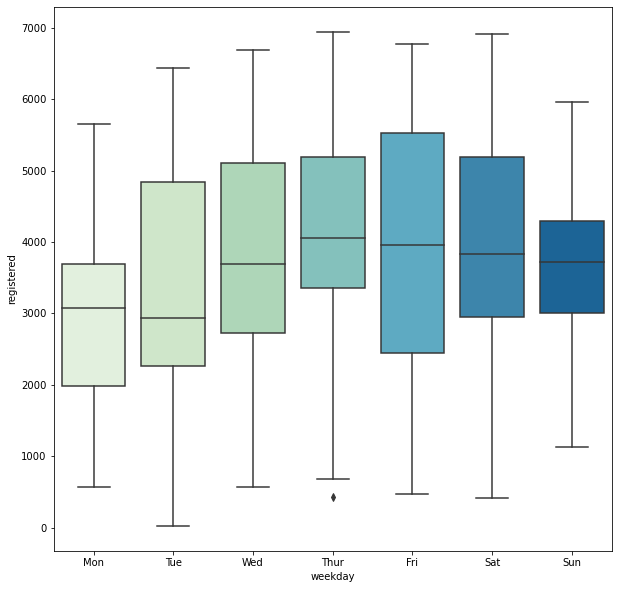

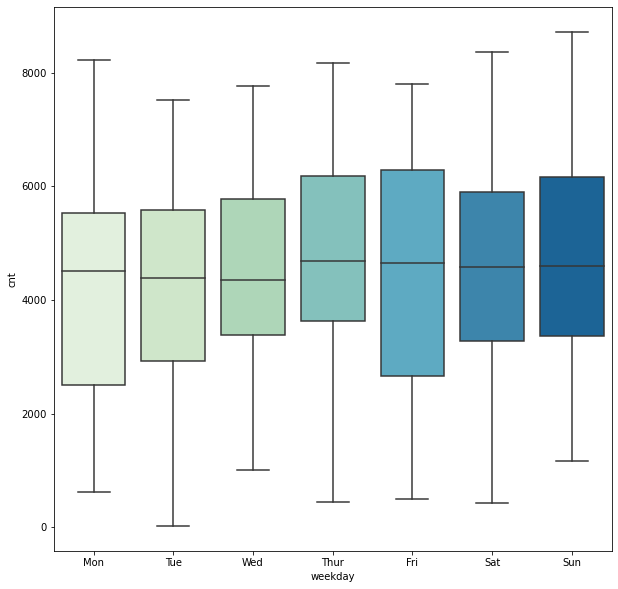

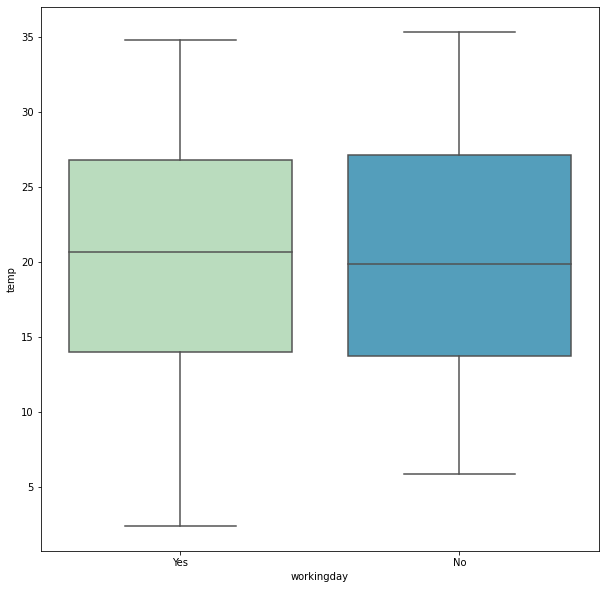

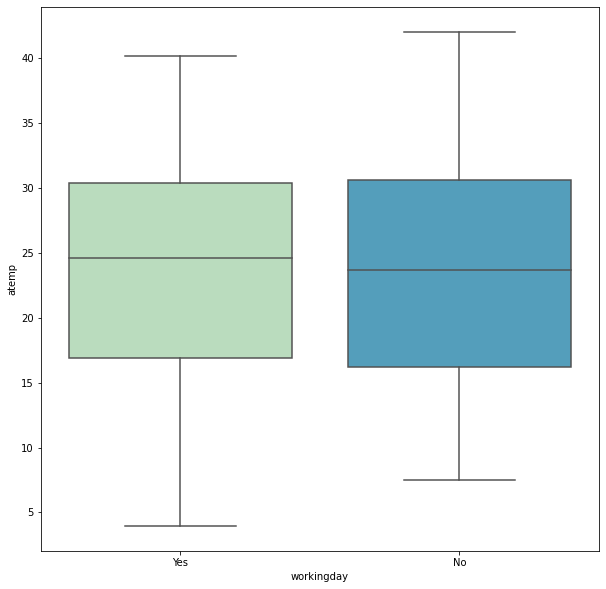

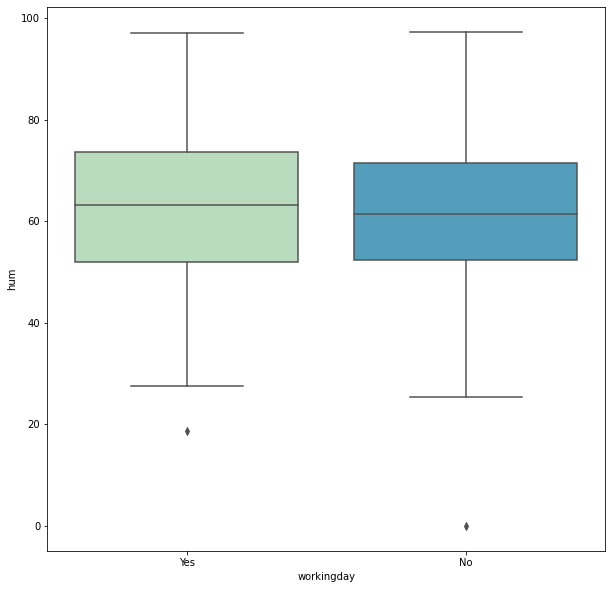

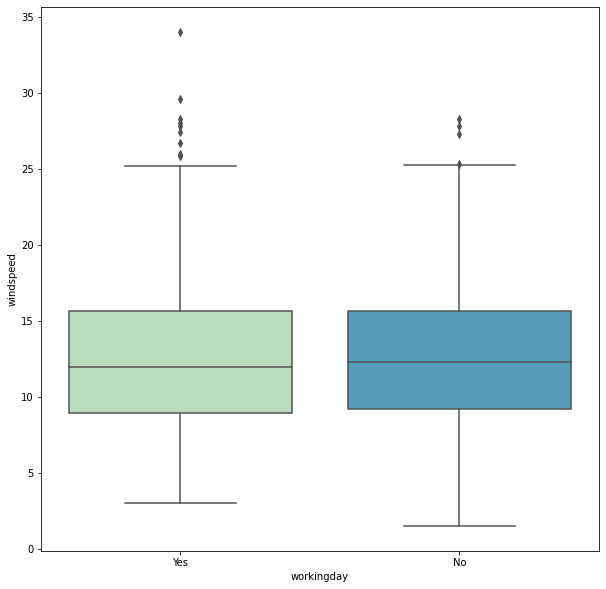

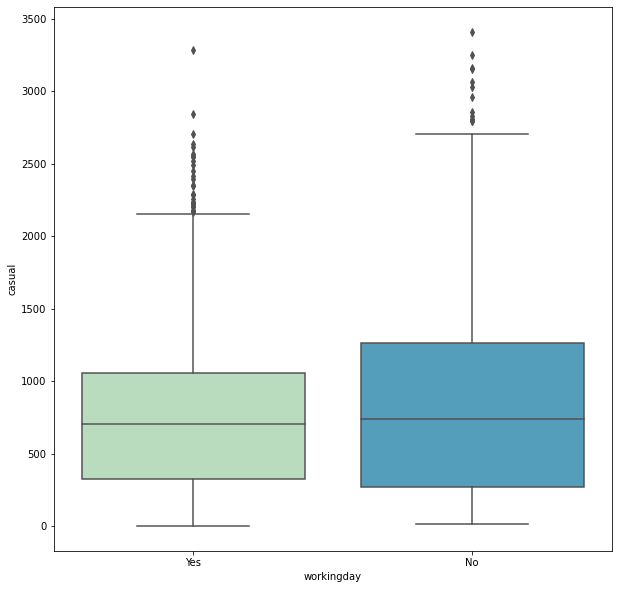

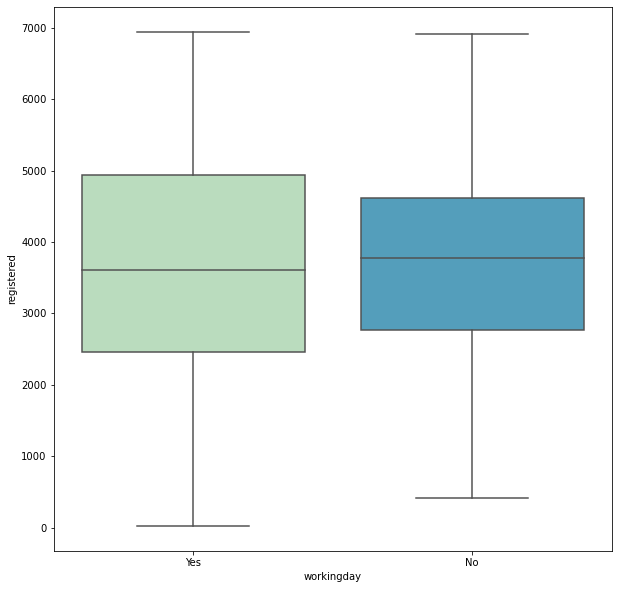

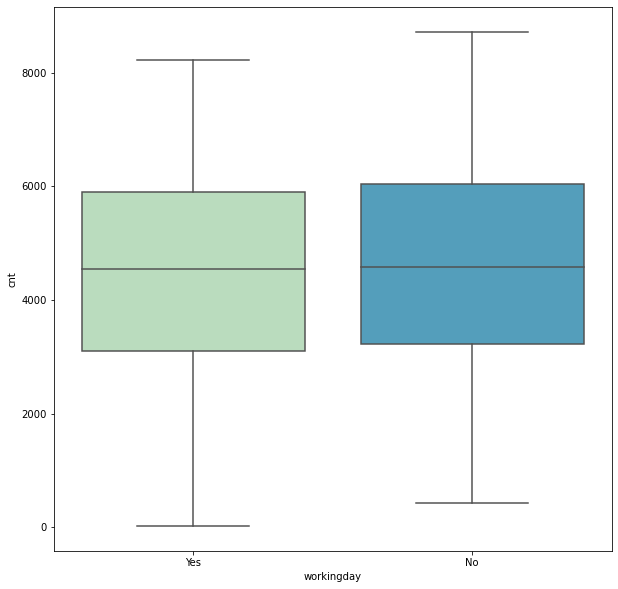

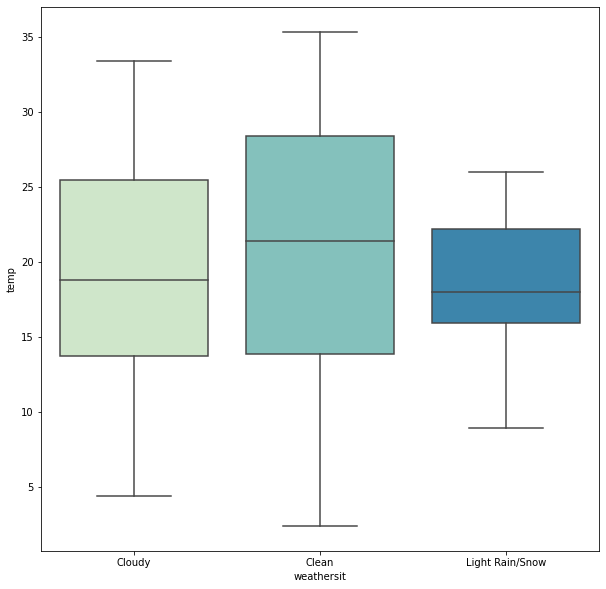

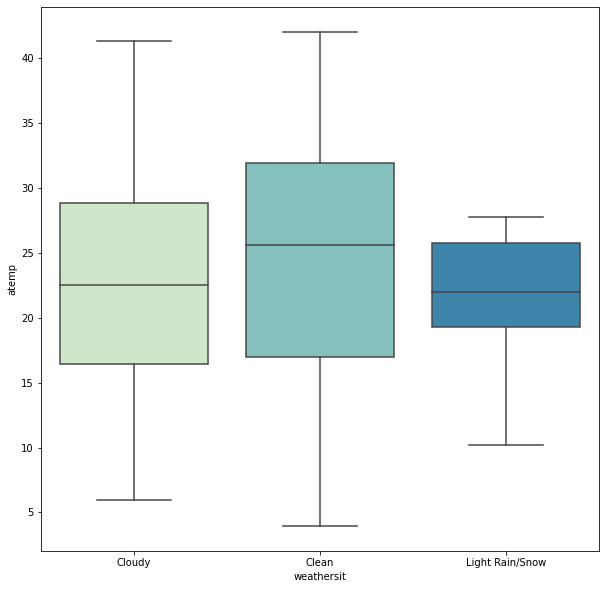

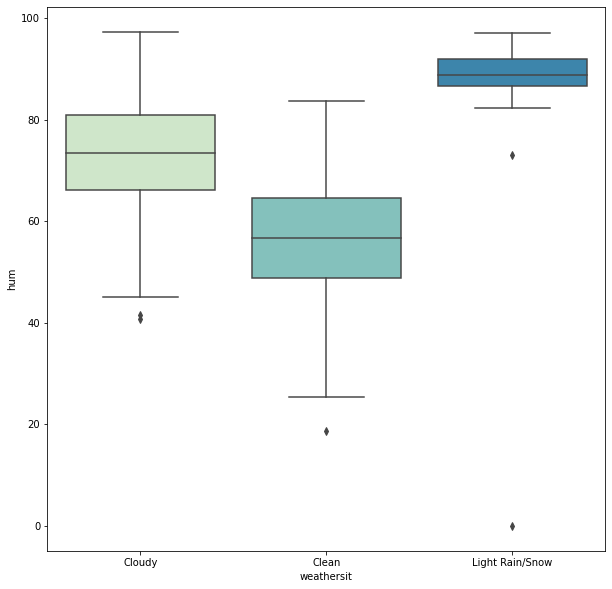

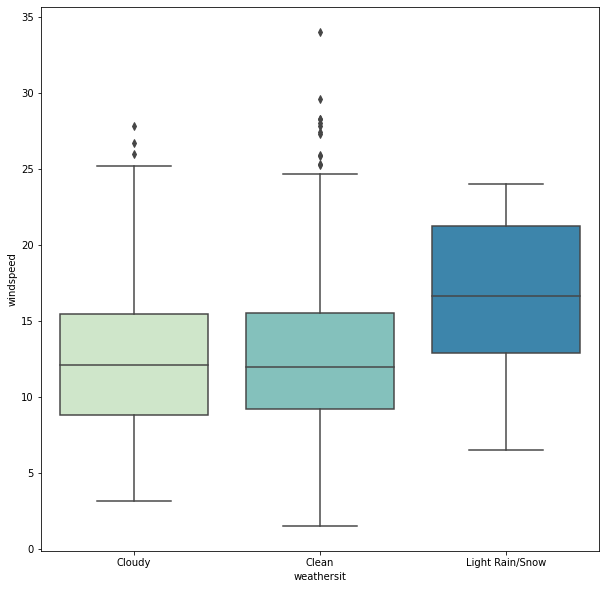

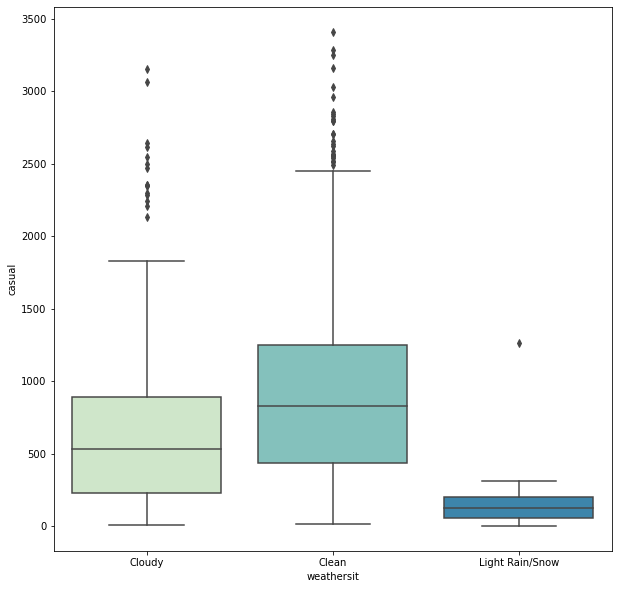

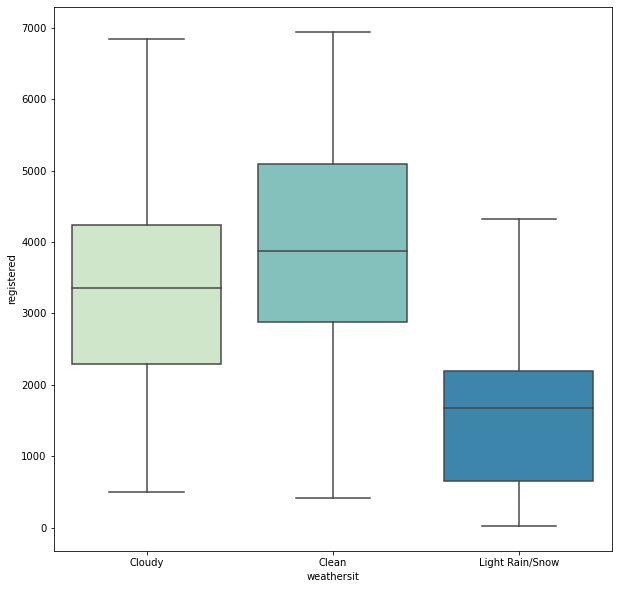

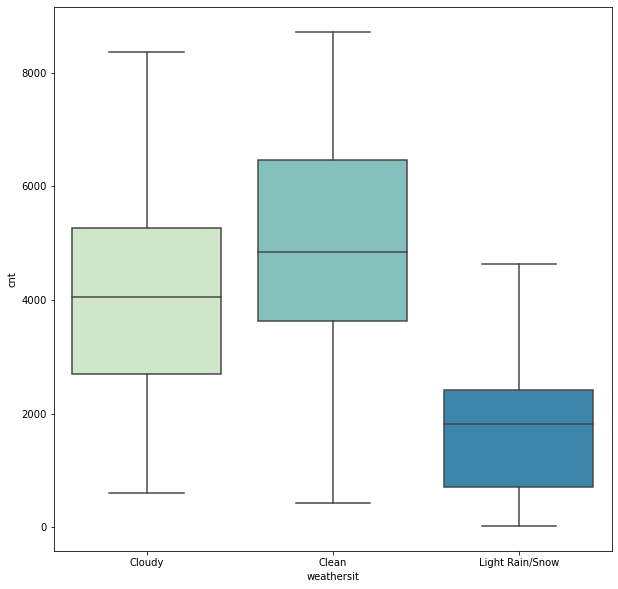

In [37]:
for i in range(0, len(cat_list)):
    cat = cat_list[i]
    for j in range(0, len(num_list)):
        num = num_list[j]
        plt.figure(figsize=(10,10))
        sns.boxplot(x=cat, y=num, data=df, palette='GnBu')

- **Inferences**.
   - We can see that count is higher in Fall season for registered users followed by winter and summer season.
   - For casual and registered users the count has gone up in 2019.
   - We can see that count for registered users is high when its not a holiday but its completely opposite in case of the casual users. For casual users count has increased if its holiday.
   - Count is higher during fridays for both causal and registered  users.
   - During working days the registered users count is higher and its opposite in case of casual users.
   - We can clearly see count is high in clean weather condition for both registerd and casual users. This means users prefer travelling more in clean weather conditoions.
   - The count is very low in Light Rain/ Snow weather condition.

In [38]:
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,Spring,2018,jan,No,Mon,Yes,Cloudy,14.11,18.18,80.58,10.75,331,654,985
1,Spring,2018,jan,No,Tue,Yes,Cloudy,14.90,17.69,69.61,16.65,131,670,801
2,Spring,2018,jan,No,Wed,Yes,Clean,8.05,9.47,43.73,16.64,120,1229,1349
3,Spring,2018,jan,No,Thur,Yes,Clean,8.20,10.61,59.04,10.74,108,1454,1562
4,Spring,2018,jan,No,Fri,Yes,Clean,9.31,11.46,43.70,12.52,82,1518,1600


## Data preparation for model building

 - For Exploratory data analysis we used both `casual` and `registered` variables to infer about our data.
 - But `casual` and `registered` together will be able to explain 100% variablility in our data. i.e. `R-squared` value will be `1` just by using both of these variables.
 - Our model will then be over-fitted and it will give 100% accuracy over training data.
 - It is better we should drop these variables before moving further to building our model.

In [39]:
df = df.drop('registered', axis=1)
df = df.drop('casual', axis=1)

In [40]:
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,Spring,2018,jan,No,Mon,Yes,Cloudy,14.11,18.18,80.58,10.75,985
1,Spring,2018,jan,No,Tue,Yes,Cloudy,14.90,17.69,69.61,16.65,801
2,Spring,2018,jan,No,Wed,Yes,Clean,8.05,9.47,43.73,16.64,1349
3,Spring,2018,jan,No,Thur,Yes,Clean,8.20,10.61,59.04,10.74,1562
4,Spring,2018,jan,No,Fri,Yes,Clean,9.31,11.46,43.70,12.52,1600


 - Creating list of columns with values 'Yes' & 'No'.

In [41]:
list1 = ['holiday','workingday']

def binary_map(x):
    return x.map({'Yes':1, 'No':0})

df[list1] = df[list1].apply(binary_map)

In [42]:
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,Spring,2018,jan,0,Mon,1,Cloudy,14.11,18.18,80.58,10.75,985
1,Spring,2018,jan,0,Tue,1,Cloudy,14.90,17.69,69.61,16.65,801
2,Spring,2018,jan,0,Wed,1,Clean,8.05,9.47,43.73,16.64,1349
3,Spring,2018,jan,0,Thur,1,Clean,8.20,10.61,59.04,10.74,1562
4,Spring,2018,jan,0,Fri,1,Clean,9.31,11.46,43.70,12.52,1600


 - For yr also we can convert into 0s and 1s.

In [43]:
df['yr'] = df['yr'].apply(lambda x: 0 if x == '2018' else 1)

In [44]:
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,Spring,0,jan,0,Mon,1,Cloudy,14.11,18.18,80.58,10.75,985
1,Spring,0,jan,0,Tue,1,Cloudy,14.90,17.69,69.61,16.65,801
2,Spring,0,jan,0,Wed,1,Clean,8.05,9.47,43.73,16.64,1349
3,Spring,0,jan,0,Thur,1,Clean,8.20,10.61,59.04,10.74,1562
4,Spring,0,jan,0,Fri,1,Clean,9.31,11.46,43.70,12.52,1600


 - For columns containing more than one sub-category, we can create dummmy variables. 

In [45]:
# creaing dummy variable for season columns

Season = pd.get_dummies(df['season'], prefix='season')

In [46]:
Season.head()

,season_Fall,season_Spring,season_Summer,season_Winter
0,0,1,0,0
1,0,1,0,0
2,0,1,0,0
3,0,1,0,0
4,0,1,0,0


In [47]:
# adding Season dataframe to original dataframe

df = pd.concat([df, Season], axis=1)

In [48]:
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,season_Fall,season_Spring,season_Summer,season_Winter
0,Spring,0,jan,0,Mon,1,Cloudy,14.11,18.18,80.58,10.75,985,0,1,0,0
1,Spring,0,jan,0,Tue,1,Cloudy,14.90,17.69,69.61,16.65,801,0,1,0,0
2,Spring,0,jan,0,Wed,1,Clean,8.05,9.47,43.73,16.64,1349,0,1,0,0
3,Spring,0,jan,0,Thur,1,Clean,8.20,10.61,59.04,10.74,1562,0,1,0,0
4,Spring,0,jan,0,Fri,1,Clean,9.31,11.46,43.70,12.52,1600,0,1,0,0


In [49]:
# dropping season columns as we have created dummy for it.

df = df.drop('season', axis=1)

In [50]:
df.head()

,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,season_Fall,season_Spring,season_Summer,season_Winter
0,0,jan,0,Mon,1,Cloudy,14.11,18.18,80.58,10.75,985,0,1,0,0
1,0,jan,0,Tue,1,Cloudy,14.90,17.69,69.61,16.65,801,0,1,0,0
2,0,jan,0,Wed,1,Clean,8.05,9.47,43.73,16.64,1349,0,1,0,0
3,0,jan,0,Thur,1,Clean,8.20,10.61,59.04,10.74,1562,0,1,0,0
4,0,jan,0,Fri,1,Clean,9.31,11.46,43.70,12.52,1600,0,1,0,0


In [51]:
# creaing dummy variable for month columns

Weather = pd.get_dummies(df['weathersit'], prefix='wthr')

In [52]:
Weather.head()

,wthr_Clean,wthr_Cloudy,wthr_Light Rain/Snow
0,0,1,0
1,0,1,0
2,1,0,0
3,1,0,0
4,1,0,0


In [53]:
# adding Season dataframe to original dataframe

df = pd.concat([df, Weather], axis=1)

In [54]:
df = df.drop('wthr_Light Rain/Snow', axis=1)

In [55]:
df.head()

,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,season_Fall,season_Spring,season_Summer,season_Winter,wthr_Clean,wthr_Cloudy
0,0,jan,0,Mon,1,Cloudy,14.11,18.18,80.58,10.75,985,0,1,0,0,0,1
1,0,jan,0,Tue,1,Cloudy,14.90,17.69,69.61,16.65,801,0,1,0,0,0,1
2,0,jan,0,Wed,1,Clean,8.05,9.47,43.73,16.64,1349,0,1,0,0,1,0
3,0,jan,0,Thur,1,Clean,8.20,10.61,59.04,10.74,1562,0,1,0,0,1,0
4,0,jan,0,Fri,1,Clean,9.31,11.46,43.70,12.52,1600,0,1,0,0,1,0


In [56]:
df = df.drop('weathersit', axis=1)

In [57]:
df.head()

,yr,mnth,holiday,weekday,workingday,temp,atemp,hum,windspeed,cnt,season_Fall,season_Spring,season_Summer,season_Winter,wthr_Clean,wthr_Cloudy
0,0,jan,0,Mon,1,14.11,18.18,80.58,10.75,985,0,1,0,0,0,1
1,0,jan,0,Tue,1,14.90,17.69,69.61,16.65,801,0,1,0,0,0,1
2,0,jan,0,Wed,1,8.05,9.47,43.73,16.64,1349,0,1,0,0,1,0
3,0,jan,0,Thur,1,8.20,10.61,59.04,10.74,1562,0,1,0,0,1,0
4,0,jan,0,Fri,1,9.31,11.46,43.70,12.52,1600,0,1,0,0,1,0


In [58]:
df.shape

(730, 16)

In [59]:
Weekday = pd.get_dummies(df['weekday'], prefix='day', drop_first=True)

In [60]:
df = pd.concat([df,Weekday],axis=1)

In [61]:
df.head()

,yr,mnth,holiday,weekday,workingday,temp,atemp,hum,windspeed,cnt,...,season_Summer,season_Winter,wthr_Clean,wthr_Cloudy,day_Mon,day_Sat,day_Sun,day_Thur,day_Tue,day_Wed
0,0,jan,0,Mon,1,14.11,18.18,80.58,10.75,985,...,0,0,0,1,1,0,0,0,0,0
1,0,jan,0,Tue,1,14.90,17.69,69.61,16.65,801,...,0,0,0,1,0,0,0,0,1,0
2,0,jan,0,Wed,1,8.05,9.47,43.73,16.64,1349,...,0,0,1,0,0,0,0,0,0,1
3,0,jan,0,Thur,1,8.20,10.61,59.04,10.74,1562,...,0,0,1,0,0,0,0,1,0,0
4,0,jan,0,Fri,1,9.31,11.46,43.70,12.52,1600,...,0,0,1,0,0,0,0,0,0,0


In [62]:
df = df.drop('weekday', axis=1)

In [63]:
df.head()

,yr,mnth,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_Fall,...,season_Summer,season_Winter,wthr_Clean,wthr_Cloudy,day_Mon,day_Sat,day_Sun,day_Thur,day_Tue,day_Wed
0,0,jan,0,1,14.11,18.18,80.58,10.75,985,0,...,0,0,0,1,1,0,0,0,0,0
1,0,jan,0,1,14.90,17.69,69.61,16.65,801,0,...,0,0,0,1,0,0,0,0,1,0
2,0,jan,0,1,8.05,9.47,43.73,16.64,1349,0,...,0,0,1,0,0,0,0,0,0,1
3,0,jan,0,1,8.20,10.61,59.04,10.74,1562,0,...,0,0,1,0,0,0,0,1,0,0
4,0,jan,0,1,9.31,11.46,43.70,12.52,1600,0,...,0,0,1,0,0,0,0,0,0,0


In [64]:
Mnth = pd.get_dummies(df['mnth'], prefix='mnth', drop_first=True)
Mnth.head()

,mnth_aug,mnth_dec,mnth_feb,mnth_jan,mnth_jul,mnth_jun,mnth_mar,mnth_may,mnth_nov,mnth_oct,mnth_sept
0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,0


In [65]:
df = pd.concat([df, Mnth], axis=1)

In [66]:
df = df.drop('mnth', axis=1)

In [67]:
pd.set_option('display.max_columns', None)

In [68]:
df.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_Fall,season_Spring,season_Summer,season_Winter,wthr_Clean,wthr_Cloudy,day_Mon,day_Sat,day_Sun,day_Thur,day_Tue,day_Wed,mnth_aug,mnth_dec,mnth_feb,mnth_jan,mnth_jul,mnth_jun,mnth_mar,mnth_may,mnth_nov,mnth_oct,mnth_sept
0,0,0,1,14.11,18.18,80.58,10.75,985,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,1,14.90,17.69,69.61,16.65,801,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0
2,0,0,1,8.05,9.47,43.73,16.64,1349,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,8.20,10.61,59.04,10.74,1562,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0
4,0,0,1,9.31,11.46,43.70,12.52,1600,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


## Splitting the Data into Training and Testing Sets

In [69]:
from sklearn.model_selection import train_test_split
np.random.seed(0)

In [70]:
df_train, df_test = train_test_split(df, train_size = 0.7, test_size = 0.3, random_state = 100)

In [71]:
df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_Fall,season_Spring,season_Summer,season_Winter,wthr_Clean,wthr_Cloudy,day_Mon,day_Sat,day_Sun,day_Thur,day_Tue,day_Wed,mnth_aug,mnth_dec,mnth_feb,mnth_jan,mnth_jul,mnth_jun,mnth_mar,mnth_may,mnth_nov,mnth_oct,mnth_sept
653,1,0,1,19.20,23.04,55.83,12.21,7534,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
576,1,0,1,29.25,33.14,70.42,11.08,7216,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0
426,1,0,0,16.98,20.67,62.12,10.79,4066,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
728,1,0,1,10.49,11.58,48.33,23.50,1796,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
482,1,0,0,15.44,18.88,48.96,8.71,4220,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [72]:
df_test.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_Fall,season_Spring,season_Summer,season_Winter,wthr_Clean,wthr_Cloudy,day_Mon,day_Sat,day_Sun,day_Thur,day_Tue,day_Wed,mnth_aug,mnth_dec,mnth_feb,mnth_jan,mnth_jul,mnth_jun,mnth_mar,mnth_may,mnth_nov,mnth_oct,mnth_sept
184,0,1,0,29.79,33.27,63.79,5.46,6043,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0
535,1,0,1,32.08,36.05,59.21,7.63,6211,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
299,0,0,0,19.27,22.85,81.29,13.25,2659,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
221,0,0,1,31.43,34.25,42.42,13.42,4780,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
152,0,0,0,29.32,32.20,30.50,19.58,4968,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


In [73]:
print(df.shape)
print(df_train.shape)
print(df_test.shape)

(730, 31)
(510, 31)
(219, 31)


## Rescaling the features

 - We are gonna use Min/Max Scaling technique for this case study.

In [74]:
from sklearn.preprocessing import MinMaxScaler

In [75]:
scaler = MinMaxScaler()

In [76]:
df.columns.values

array(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'cnt', 'season_Fall', 'season_Spring', 'season_Summer',
       'season_Winter', 'wthr_Clean', 'wthr_Cloudy', 'day_Mon', 'day_Sat',
       'day_Sun', 'day_Thur', 'day_Tue', 'day_Wed', 'mnth_aug',
       'mnth_dec', 'mnth_feb', 'mnth_jan', 'mnth_jul', 'mnth_jun',
       'mnth_mar', 'mnth_may', 'mnth_nov', 'mnth_oct', 'mnth_sept'],
      dtype=object)

In [77]:
# Applying scaler() to all the columns except for 'yes-no' and dummy variables.

var_list = ['temp', 'atemp', 'hum', 'windspeed', 'cnt']

In [78]:
df_train[var_list] = scaler.fit_transform(df_train[var_list])

In [79]:
df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_Fall,season_Spring,season_Summer,season_Winter,wthr_Clean,wthr_Cloudy,day_Mon,day_Sat,day_Sun,day_Thur,day_Tue,day_Wed,mnth_aug,mnth_dec,mnth_feb,mnth_jan,mnth_jul,mnth_jun,mnth_mar,mnth_may,mnth_nov,mnth_oct,mnth_sept
653,1,0,1,0.509875,0.501181,0.575330,0.300930,0.864243,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
576,1,0,1,0.815254,0.766343,0.725680,0.264678,0.827658,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0
426,1,0,0,0.442419,0.438960,0.640148,0.255374,0.465255,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
728,1,0,1,0.245214,0.200315,0.498042,0.663138,0.204096,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
482,1,0,0,0.395624,0.391966,0.504534,0.188643,0.482973,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [80]:
df_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_Fall,season_Spring,season_Summer,season_Winter,wthr_Clean,wthr_Cloudy,day_Mon,day_Sat,day_Sun,day_Thur,day_Tue,day_Wed,mnth_aug,mnth_dec,mnth_feb,mnth_jan,mnth_jul,mnth_jun,mnth_mar,mnth_may,mnth_nov,mnth_oct,mnth_sept
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.00000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.711765,0.537300,0.513098,0.650378,0.320866,0.513620,0.262745,0.243137,0.245098,0.24902,0.627451,0.343137,0.154902,0.129412,0.137255,0.143137,0.152941,0.135294,0.096078,0.084314,0.066667,0.088235,0.076471,0.074510,0.098039,0.084314,0.086275,0.086275,0.080392
std,0.500429,0.157763,0.453386,0.225801,0.212393,0.145885,0.169770,0.224593,0.440557,0.429398,0.430568,0.43287,0.483958,0.475223,0.362166,0.335985,0.344454,0.350557,0.360284,0.342373,0.294988,0.278131,0.249689,0.283915,0.266010,0.262857,0.297660,0.278131,0.281045,0.281045,0.272166
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339866,0.332174,0.538644,0.199230,0.356420,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.540565,0.527041,0.653751,0.296760,0.518638,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735339,0.688632,0.754818,0.414501,0.684710,1.000000,0.000000,0.000000,0.00000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Dividing dataframe into X and y for model building

In [81]:
y_train = df_train.pop('cnt')
X_train = df_train

## Building our first Model

### RFE
   - We will use Recursive Feature elimintation method for our model  bulding. 

In [82]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [83]:
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 15)
rfe = rfe.fit(X_train, y_train)

In [84]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 3),
 ('temp', True, 1),
 ('atemp', False, 6),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_Fall', True, 1),
 ('season_Spring', True, 1),
 ('season_Summer', False, 12),
 ('season_Winter', True, 1),
 ('wthr_Clean', True, 1),
 ('wthr_Cloudy', True, 1),
 ('day_Mon', False, 9),
 ('day_Sat', False, 4),
 ('day_Sun', False, 5),
 ('day_Thur', False, 14),
 ('day_Tue', False, 8),
 ('day_Wed', False, 11),
 ('mnth_aug', False, 10),
 ('mnth_dec', True, 1),
 ('mnth_feb', False, 2),
 ('mnth_jan', True, 1),
 ('mnth_jul', True, 1),
 ('mnth_jun', False, 15),
 ('mnth_mar', False, 16),
 ('mnth_may', False, 7),
 ('mnth_nov', True, 1),
 ('mnth_oct', False, 13),
 ('mnth_sept', True, 1)]

In [85]:
col = X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'temp', 'hum', 'windspeed', 'season_Fall',
       'season_Spring', 'season_Winter', 'wthr_Clean', 'wthr_Cloudy',
       'mnth_dec', 'mnth_jan', 'mnth_jul', 'mnth_nov', 'mnth_sept'],
      dtype='object')

In [86]:
X_train.columns[~rfe.support_]

Index(['workingday', 'atemp', 'season_Summer', 'day_Mon', 'day_Sat', 'day_Sun',
       'day_Thur', 'day_Tue', 'day_Wed', 'mnth_aug', 'mnth_feb', 'mnth_jun',
       'mnth_mar', 'mnth_may', 'mnth_oct'],
      dtype='object')

## Building model using statsmodel, for the detailed statistics

In [87]:
# Creating X_train dataframe with RFE selected variables

X_train_rfe = X_train[col]

In [88]:
import statsmodels.api as sm

In [89]:
X_train_rfe = sm.add_constant(X_train_rfe)

In [90]:
lm = sm.OLS(y_train, X_train_rfe).fit()

In [91]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     180.2
Date:                Mon, 08 Mar 2021   Prob (F-statistic):          3.38e-189
Time:                        06:57:57   Log-Likelihood:                 514.71
No. Observations:                 510   AIC:                            -997.4
Df Residuals:                     494   BIC:                            -929.7
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.1129      0.045      2.512

### Checking for multicollinearity.

In [92]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [93]:
X_train_new = X_train_rfe.drop('const',axis=1)

In [94]:
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i)for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
2,temp,27.68
3,hum,22.72
8,wthr_Clean,13.21
9,wthr_Cloudy,8.40
4,windspeed,4.38
5,season_Fall,3.92
6,season_Spring,3.34
7,season_Winter,3.30
0,yr,2.09
13,mnth_nov,1.91


 - Rebuilding the model.

In [95]:
X = X_train_new.drop('hum', axis=1)

In [96]:
X_train_lm = sm.add_constant(X)

In [97]:
lm = sm.OLS(y_train, X_train_lm).fit()

In [98]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     185.4
Date:                Mon, 08 Mar 2021   Prob (F-statistic):          1.59e-186
Time:                        06:57:57   Log-Likelihood:                 505.59
No. Observations:                 510   AIC:                            -981.2
Df Residuals:                     495   BIC:                            -917.7
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.0130      0.034     -0.378

In [99]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i)for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
2,temp,17.79
7,wthr_Clean,12.92
8,wthr_Cloudy,7.15
3,windspeed,4.37
4,season_Fall,3.83
5,season_Spring,3.01
6,season_Winter,2.98
0,yr,2.08
12,mnth_nov,1.90
10,mnth_jan,1.76


In [100]:
X = X.drop('wthr_Cloudy', axis=1)

In [101]:
X_train_lm = sm.add_constant(X)

lm = sm.OLS(y_train, X_train_lm).fit()

print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.817
Model:                            OLS   Adj. R-squared:                  0.812
Method:                 Least Squares   F-statistic:                     170.0
Date:                Mon, 08 Mar 2021   Prob (F-statistic):          3.44e-173
Time:                        06:57:57   Log-Likelihood:                 471.12
No. Observations:                 510   AIC:                            -914.2
Df Residuals:                     496   BIC:                            -855.0
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.1832      0.027      6.769

In [102]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i)for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
2,temp,7.95
3,windspeed,4.12
4,season_Fall,3.75
6,season_Winter,2.91
7,wthr_Clean,2.73
5,season_Spring,2.51
0,yr,2.06
11,mnth_nov,1.84
9,mnth_jan,1.64
10,mnth_jul,1.58


In [103]:
X = X.drop('mnth_nov', axis=1)

In [104]:
X_train_lm = sm.add_constant(X)

lm = sm.OLS(y_train, X_train_lm).fit()

print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.811
Method:                 Least Squares   F-statistic:                     183.4
Date:                Mon, 08 Mar 2021   Prob (F-statistic):          8.61e-174
Time:                        06:57:57   Log-Likelihood:                 469.84
No. Observations:                 510   AIC:                            -913.7
Df Residuals:                     497   BIC:                            -858.6
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.1748      0.027      6.576

In [105]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i)for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
2,temp,7.72
3,windspeed,4.07
4,season_Fall,3.67
7,wthr_Clean,2.71
5,season_Spring,2.51
0,yr,2.06
6,season_Winter,1.89
9,mnth_jan,1.63
10,mnth_jul,1.57
11,mnth_sept,1.40


In [106]:
X = X.drop('mnth_dec', axis=1)

In [107]:
X_train_lm = sm.add_constant(X)

lm = sm.OLS(y_train, X_train_lm).fit()

print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.815
Model:                            OLS   Adj. R-squared:                  0.811
Method:                 Least Squares   F-statistic:                     199.7
Date:                Mon, 08 Mar 2021   Prob (F-statistic):          1.31e-174
Time:                        06:57:58   Log-Likelihood:                 469.02
No. Observations:                 510   AIC:                            -914.0
Df Residuals:                     498   BIC:                            -863.2
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.1672      0.026      6.454

In [108]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i)for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
2,temp,7.67
3,windspeed,4.07
4,season_Fall,3.65
7,wthr_Clean,2.70
5,season_Spring,2.38
0,yr,2.06
6,season_Winter,1.61
8,mnth_jan,1.59
9,mnth_jul,1.57
10,mnth_sept,1.40


In [109]:
X = X.drop('mnth_jan', axis=1)

In [110]:
X_train_lm = sm.add_constant(X)

lm = sm.OLS(y_train, X_train_lm).fit()

print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.814
Model:                            OLS   Adj. R-squared:                  0.810
Method:                 Least Squares   F-statistic:                     218.5
Date:                Mon, 08 Mar 2021   Prob (F-statistic):          3.58e-175
Time:                        06:57:58   Log-Likelihood:                 467.56
No. Observations:                 510   AIC:                            -913.1
Df Residuals:                     499   BIC:                            -866.5
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.1557      0.025      6.217

In [111]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i)for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
2,temp,7.63
3,windspeed,4.07
4,season_Fall,3.63
7,wthr_Clean,2.70
0,yr,2.05
5,season_Spring,1.74
6,season_Winter,1.61
8,mnth_jul,1.57
9,mnth_sept,1.40
1,holiday,1.04


In [112]:
X = X.drop('windspeed', axis=1)

In [113]:
X_train_lm = sm.add_constant(X)

lm = sm.OLS(y_train, X_train_lm).fit()

print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.799
Model:                            OLS   Adj. R-squared:                  0.795
Method:                 Least Squares   F-statistic:                     220.4
Date:                Mon, 08 Mar 2021   Prob (F-statistic):          9.43e-168
Time:                        06:57:58   Log-Likelihood:                 447.23
No. Observations:                 510   AIC:                            -874.5
Df Residuals:                     500   BIC:                            -832.1
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0878      0.024      3.719

In [114]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i)for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
2,temp,5.47
3,season_Fall,3.53
6,wthr_Clean,2.69
0,yr,2.05
5,season_Winter,1.57
7,mnth_jul,1.57
4,season_Spring,1.40
8,mnth_sept,1.39
1,holiday,1.04


In [115]:
X = X.drop('season_Winter',axis=1)

In [116]:
X_train_lm = sm.add_constant(X)

lm = sm.OLS(y_train, X_train_lm).fit()

print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.795
Model:                            OLS   Adj. R-squared:                  0.792
Method:                 Least Squares   F-statistic:                     243.4
Date:                Mon, 08 Mar 2021   Prob (F-statistic):          3.34e-167
Time:                        06:57:58   Log-Likelihood:                 443.09
No. Observations:                 510   AIC:                            -868.2
Df Residuals:                     501   BIC:                            -830.1
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.1270      0.019      6.548

In [117]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i)for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
2,temp,4.84
3,season_Fall,2.92
5,wthr_Clean,2.64
0,yr,2.03
6,mnth_jul,1.57
7,mnth_sept,1.37
4,season_Spring,1.29
1,holiday,1.04


## Making predictions

In [118]:
y_train_pred = lm.predict(X_train_lm)

 ## Residual Analysis
 - Checking if the error terms are normally distributed.

Text(0.5, 0, 'Errors')

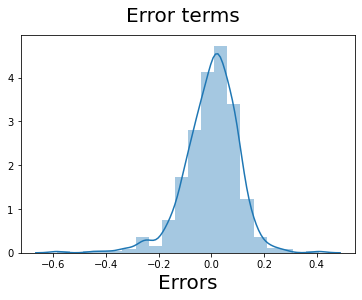

In [119]:
fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Error terms', fontsize=20)
plt.xlabel('Errors', fontsize=20)

 - We can clearly see that error terms are normally distributed.

## Making predictions using final model

 - Applying scaling on the test set

In [120]:
num_list = ['temp', 'atemp', 'hum', 'windspeed', 'cnt']

In [121]:
df_test[num_list] = scaler.transform(df_test[num_list]) 

In [122]:
df_test.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_Fall,season_Spring,season_Summer,season_Winter,wthr_Clean,wthr_Cloudy,day_Mon,day_Sat,day_Sun,day_Thur,day_Tue,day_Wed,mnth_aug,mnth_dec,mnth_feb,mnth_jan,mnth_jul,mnth_jun,mnth_mar,mnth_may,mnth_nov,mnth_oct,mnth_sept
184,0,1,0,0.831662,0.769756,0.657358,0.084376,0.692706,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0
535,1,0,1,0.901246,0.842741,0.610161,0.153994,0.712034,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
299,0,0,0,0.512002,0.496193,0.837696,0.334296,0.303382,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
221,0,0,1,0.881495,0.795484,0.437139,0.339750,0.547400,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
152,0,0,0,0.817381,0.741664,0.314303,0.537376,0.569029,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


In [123]:
y_test = df_test.pop('cnt')
X_test = df_test

In [124]:
X_test_final = X_test[['yr', 'holiday', 'temp', 'season_Fall', 'season_Spring',
       'wthr_Clean', 'mnth_jul', 'mnth_sept']]

In [125]:
X_test_final = sm.add_constant(X_test_final)

In [126]:
y_pred_final = lm.predict(X_test_final)

In [127]:
from sklearn.metrics import mean_squared_error, r2_score

## Model Evaluation 

In [128]:
mse = mean_squared_error(y_test, y_pred_final)
r2_score = r2_score(y_test, y_pred_final)

In [129]:
print('Mean_Squared_Error :' ,mse)
print('r_square_value :',r2_score)

Mean_Squared_Error : 0.010149900978797845
r_square_value : 0.7862990151324062


In [130]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.795
Model:                            OLS   Adj. R-squared:                  0.792
Method:                 Least Squares   F-statistic:                     243.4
Date:                Mon, 08 Mar 2021   Prob (F-statistic):          3.34e-167
Time:                        06:57:58   Log-Likelihood:                 443.09
No. Observations:                 510   AIC:                            -868.2
Df Residuals:                     501   BIC:                            -830.1
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.1270      0.019      6.548

 - `R-squared of train = 0.795`
 - `R-squaed of test = 0.786`
 

## Checking predicted values against actual values.

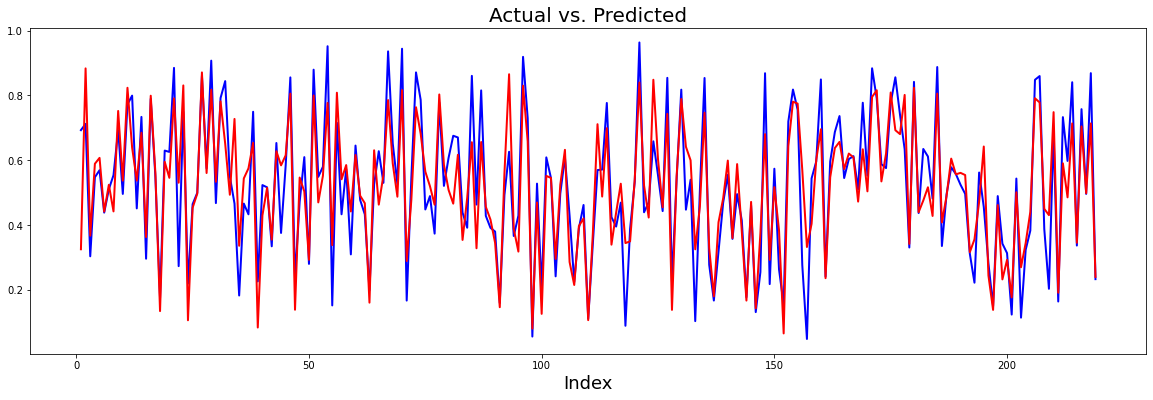

In [131]:
c = [i for i in range(1,220,1)]
plt.figure(figsize=(20,6))
plt.plot(c,y_test, color="blue", linewidth=2, linestyle="-")
plt.plot(c,y_pred_final, color="red", linewidth=2, linestyle="-")
plt.title('Actual vs. Predicted', fontsize=20)              
plt.xlabel('Index', fontsize=18)   
plt.show()

## Building Second Model

In [132]:
df_train1, df_test1 = train_test_split(df, train_size = 0.7, test_size = 0.3, random_state = 100)

In [133]:
print(df.shape)
print(df_train1.shape)
print(df_test1.shape)

(730, 31)
(510, 31)
(219, 31)


In [134]:
scaler = MinMaxScaler()

In [135]:
var_list = ['temp', 'atemp', 'hum', 'windspeed', 'cnt']

In [136]:
df_train1[var_list] = scaler.fit_transform(df_train1[var_list])

In [137]:
df_train1.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_Fall,season_Spring,season_Summer,season_Winter,wthr_Clean,wthr_Cloudy,day_Mon,day_Sat,day_Sun,day_Thur,day_Tue,day_Wed,mnth_aug,mnth_dec,mnth_feb,mnth_jan,mnth_jul,mnth_jun,mnth_mar,mnth_may,mnth_nov,mnth_oct,mnth_sept
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.00000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.711765,0.537300,0.513098,0.650378,0.320866,0.513620,0.262745,0.243137,0.245098,0.24902,0.627451,0.343137,0.154902,0.129412,0.137255,0.143137,0.152941,0.135294,0.096078,0.084314,0.066667,0.088235,0.076471,0.074510,0.098039,0.084314,0.086275,0.086275,0.080392
std,0.500429,0.157763,0.453386,0.225801,0.212393,0.145885,0.169770,0.224593,0.440557,0.429398,0.430568,0.43287,0.483958,0.475223,0.362166,0.335985,0.344454,0.350557,0.360284,0.342373,0.294988,0.278131,0.249689,0.283915,0.266010,0.262857,0.297660,0.278131,0.281045,0.281045,0.272166
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339866,0.332174,0.538644,0.199230,0.356420,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.540565,0.527041,0.653751,0.296760,0.518638,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735339,0.688632,0.754818,0.414501,0.684710,1.000000,0.000000,0.000000,0.00000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [138]:
y_train = df_train1.pop('cnt')
X_train = df_train1

In [139]:
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 15)
rfe = rfe.fit(X_train, y_train)

In [140]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 3),
 ('temp', True, 1),
 ('atemp', False, 6),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_Fall', True, 1),
 ('season_Spring', True, 1),
 ('season_Summer', False, 12),
 ('season_Winter', True, 1),
 ('wthr_Clean', True, 1),
 ('wthr_Cloudy', True, 1),
 ('day_Mon', False, 9),
 ('day_Sat', False, 4),
 ('day_Sun', False, 5),
 ('day_Thur', False, 14),
 ('day_Tue', False, 8),
 ('day_Wed', False, 11),
 ('mnth_aug', False, 10),
 ('mnth_dec', True, 1),
 ('mnth_feb', False, 2),
 ('mnth_jan', True, 1),
 ('mnth_jul', True, 1),
 ('mnth_jun', False, 15),
 ('mnth_mar', False, 16),
 ('mnth_may', False, 7),
 ('mnth_nov', True, 1),
 ('mnth_oct', False, 13),
 ('mnth_sept', True, 1)]

In [141]:
col = X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'temp', 'hum', 'windspeed', 'season_Fall',
       'season_Spring', 'season_Winter', 'wthr_Clean', 'wthr_Cloudy',
       'mnth_dec', 'mnth_jan', 'mnth_jul', 'mnth_nov', 'mnth_sept'],
      dtype='object')

In [142]:
X_train.columns[~rfe.support_]

Index(['workingday', 'atemp', 'season_Summer', 'day_Mon', 'day_Sat', 'day_Sun',
       'day_Thur', 'day_Tue', 'day_Wed', 'mnth_aug', 'mnth_feb', 'mnth_jun',
       'mnth_mar', 'mnth_may', 'mnth_oct'],
      dtype='object')

In [143]:
X_train_rfe = X_train[col]

In [144]:
X_train_rfe = sm.add_constant(X_train_rfe)
lm = sm.OLS(y_train, X_train_rfe).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     180.2
Date:                Mon, 08 Mar 2021   Prob (F-statistic):          3.38e-189
Time:                        06:57:59   Log-Likelihood:                 514.71
No. Observations:                 510   AIC:                            -997.4
Df Residuals:                     494   BIC:                            -929.7
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.1129      0.045      2.512

In [145]:
X_train_new = X_train_rfe.drop('const',axis=1)

In [146]:
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i)for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
2,temp,27.68
3,hum,22.72
8,wthr_Clean,13.21
9,wthr_Cloudy,8.40
4,windspeed,4.38
5,season_Fall,3.92
6,season_Spring,3.34
7,season_Winter,3.30
0,yr,2.09
13,mnth_nov,1.91


In [147]:
X = X_train_new.drop('temp', axis=1)

In [148]:
X_train_lm = sm.add_constant(X)
lm = sm.OLS(y_train, X_train_lm).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.793
Model:                            OLS   Adj. R-squared:                  0.787
Method:                 Least Squares   F-statistic:                     135.3
Date:                Mon, 08 Mar 2021   Prob (F-statistic):          5.43e-159
Time:                        06:57:59   Log-Likelihood:                 439.92
No. Observations:                 510   AIC:                            -849.8
Df Residuals:                     495   BIC:                            -786.3
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2584      0.050      5.131

In [149]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i)for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
2,hum,14.60
7,wthr_Clean,9.64
8,wthr_Cloudy,7.53
3,windspeed,4.33
6,season_Winter,3.24
4,season_Fall,3.03
5,season_Spring,2.65
0,yr,2.03
12,mnth_nov,1.80
10,mnth_jan,1.64


In [150]:
X = X.drop('hum', axis=1)

In [151]:
X_train_lm = sm.add_constant(X)
lm = sm.OLS(y_train, X_train_lm).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.793
Model:                            OLS   Adj. R-squared:                  0.787
Method:                 Least Squares   F-statistic:                     145.8
Date:                Mon, 08 Mar 2021   Prob (F-statistic):          5.48e-160
Time:                        06:57:59   Log-Likelihood:                 439.70
No. Observations:                 510   AIC:                            -851.4
Df Residuals:                     496   BIC:                            -792.1
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2324      0.031      7.384

In [152]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i)for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
6,wthr_Clean,5.28
2,windspeed,4.24
7,wthr_Cloudy,3.20
5,season_Winter,2.97
3,season_Fall,2.92
4,season_Spring,2.65
0,yr,2.03
11,mnth_nov,1.79
9,mnth_jan,1.64
10,mnth_jul,1.57


In [153]:
X = X.drop('mnth_jul', axis=1)

In [154]:
X_train_lm = sm.add_constant(X)
lm = sm.OLS(y_train, X_train_lm).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.792
Model:                            OLS   Adj. R-squared:                  0.787
Method:                 Least Squares   F-statistic:                     158.0
Date:                Mon, 08 Mar 2021   Prob (F-statistic):          6.34e-161
Time:                        06:57:59   Log-Likelihood:                 439.29
No. Observations:                 510   AIC:                            -852.6
Df Residuals:                     497   BIC:                            -797.5
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2319      0.031      7.373

In [155]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i)for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
6,wthr_Clean,5.28
2,windspeed,4.24
7,wthr_Cloudy,3.19
5,season_Winter,2.96
4,season_Spring,2.65
3,season_Fall,2.23
0,yr,2.03
10,mnth_nov,1.78
9,mnth_jan,1.64
8,mnth_dec,1.46


In [156]:
X = X.drop('season_Winter', axis=1)

In [157]:
X_train_lm = sm.add_constant(X)
lm = sm.OLS(y_train, X_train_lm).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.791
Model:                            OLS   Adj. R-squared:                  0.786
Method:                 Least Squares   F-statistic:                     171.4
Date:                Mon, 08 Mar 2021   Prob (F-statistic):          2.14e-161
Time:                        06:57:59   Log-Likelihood:                 437.73
No. Observations:                 510   AIC:                            -851.5
Df Residuals:                     498   BIC:                            -800.6
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2490      0.030      8.311

In [158]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i)for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
5,wthr_Clean,4.75
2,windspeed,4.24
6,wthr_Cloudy,2.89
4,season_Spring,2.25
0,yr,2.03
3,season_Fall,1.88
8,mnth_jan,1.64
10,mnth_sept,1.26
9,mnth_nov,1.24
7,mnth_dec,1.18


In [159]:
X.columns.values

array(['yr', 'holiday', 'windspeed', 'season_Fall', 'season_Spring',
       'wthr_Clean', 'wthr_Cloudy', 'mnth_dec', 'mnth_jan', 'mnth_nov',
       'mnth_sept'], dtype=object)

## Making predictions

In [160]:
y_train_pred = lm.predict(X_train_lm)

## Residual analysis

Text(0.5, 0, 'Errors')

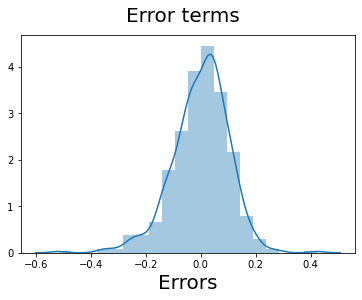

In [161]:
fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Error terms', fontsize=20)
plt.xlabel('Errors', fontsize=20)

## Making predictions using second model

In [162]:
num_list = ['temp', 'atemp', 'hum', 'windspeed', 'cnt']

In [163]:
# Scaling the test data

df_test1[num_list] = scaler.transform(df_test1[num_list])

In [164]:
y_test1 = df_test1.pop('cnt')
X_test1 = df_test1

In [165]:
X.columns.values

array(['yr', 'holiday', 'windspeed', 'season_Fall', 'season_Spring',
       'wthr_Clean', 'wthr_Cloudy', 'mnth_dec', 'mnth_jan', 'mnth_nov',
       'mnth_sept'], dtype=object)

In [166]:
X_test_final = X_test[['yr', 'holiday', 'windspeed', 'season_Fall', 'season_Spring',
       'wthr_Clean', 'wthr_Cloudy', 'mnth_dec', 'mnth_jan', 'mnth_nov',
       'mnth_sept']]

In [167]:
X_test_final = sm.add_constant(X_test_final)

In [168]:
y_pred_final = lm.predict(X_test_final)

In [169]:
mse = mean_squared_error(y_test1, y_pred_final)

In [170]:
from sklearn.metrics import r2_score

In [171]:
r2 = r2_score(y_test1, y_pred_final)

In [172]:
print('Mean_Squared_Error :' ,mse)
print('r_square_value :',r2)

Mean_Squared_Error : 0.010809820389884312
r_square_value : 0.7724047487373932


In [173]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.791
Model:                            OLS   Adj. R-squared:                  0.786
Method:                 Least Squares   F-statistic:                     171.4
Date:                Mon, 08 Mar 2021   Prob (F-statistic):          2.14e-161
Time:                        06:57:59   Log-Likelihood:                 437.73
No. Observations:                 510   AIC:                            -851.5
Df Residuals:                     498   BIC:                            -800.6
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2490      0.030      8.311

 - `R-squared of train = 0.791`
 - `R-squaed of test = 0.772`

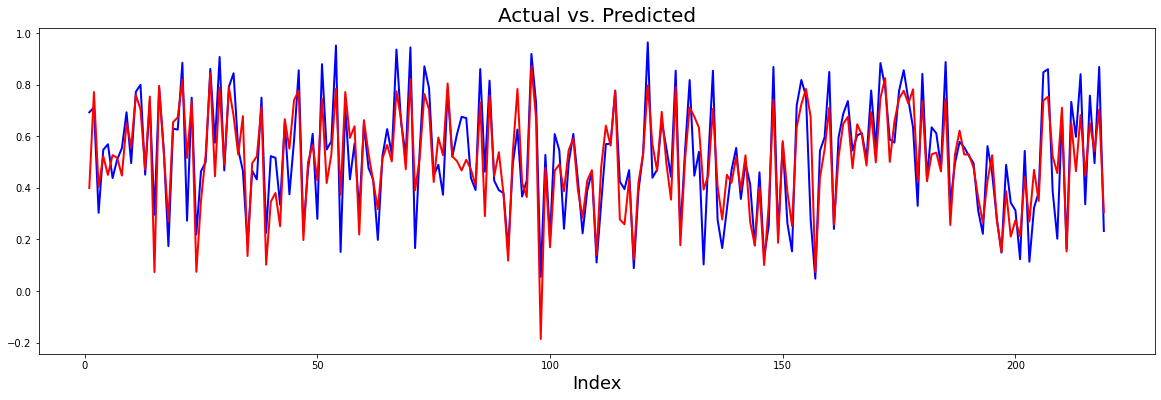

In [174]:
c = [i for i in range(1,220,1)]
plt.figure(figsize=(20,6))
plt.plot(c,y_test1, color="blue", linewidth=2, linestyle="-")
plt.plot(c,y_pred_final, color="red", linewidth=2, linestyle="-")
plt.title('Actual vs. Predicted', fontsize=20)              
plt.xlabel('Index', fontsize=18)   
plt.show()

 - **Inferences**.
     - We have created two models using both RFE and then by manual approach.
     - We have dropped features based on p-value, VIF and also depending upon business prespective.
     - Our first model has R-squared value of 0.795 on training data and 0.786 on test data. 
     - Our second model has R-squared value of 0.791 on training data and 0.772 on test data. 
     - Our first model is using only 8 features whereas second model is using 11 variables.
     - Although second model is using more features, still thte r-squared values is slightly low for both train and test data.
     - So we have decided to use first model as our findal model as the accuracy is around 80% and all the variables are significant.

 # Thank You.